## Can we predict that a player will be drafted based solely on his performance at the NFL draft? 
### Are there any specific factors that make someone more or less "draft-able"?

In [1769]:
import pandas as pd
import numpy as np
from numpy import nan
import os
import glob
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Import data from csv files

In [1770]:
# we will use the 2009-2019 Combine data of this exercise.
os.chdir("/home/ubuntop/Desktop/Python for Data Science/Final Project/StatHead")
combine_2000 = pd.read_csv('2000 Combine.csv')
combine_2001 = pd.read_csv('2001 Combine.csv')
combine_2002 = pd.read_csv('2002 Combine.csv')
combine_2003 = pd.read_csv('2003 Combine.csv')
combine_2004 = pd.read_csv('2004 Combine.csv')
combine_2005 = pd.read_csv('2005 Combine.csv')
combine_2006 = pd.read_csv('2006 Combine.csv')
combine_2007 = pd.read_csv('2007 Combine.csv')
combine_2008 = pd.read_csv('2008 Combine.csv')
combine_2009 = pd.read_csv('2009 Combine.csv')
combine_2010 = pd.read_csv('2010 Combine.csv')
combine_2011 = pd.read_csv('2011 Combine.csv')
combine_2012 = pd.read_csv('2012 Combine.csv')
combine_2013 = pd.read_csv('2013 Combine.csv')
combine_2014 = pd.read_csv('2014 Combine.csv')
combine_2015 = pd.read_csv('2015 Combine.csv')
combine_2016 = pd.read_csv('2016 Combine.csv')
combine_2017 = pd.read_csv('2017 Combine.csv')
combine_2018 = pd.read_csv('2018 Combine.csv')
combine_2019 = pd.read_csv('2019 Combine.csv')
combine_2020 = pd.read_csv('2020 Combine.csv')
combine_2021 = pd.read_csv('2021 Combine.csv')
combine_2022 = pd.read_csv('2022 Combine.csv')

## Clean Data
### Start with importing a classified list of schools

In [1771]:
os.chdir("/home/ubuntop/Desktop/Python for Data Science/Final Project")
schools_grouping = pd.read_csv('Schools_list.csv')
schools_grouping.head()

,Group_of_5,Power_5
0,Air Force,Alabama
1,Akron,Arizona
2,Appalachian St.,Arizona St.
3,Appalachian State,Arizona State
4,Arkansas St.,Arkansas


In [1774]:
#make the DF columns into two lists
group_of_5 = list(schools_grouping.Group_of_5.dropna())
power_5 = list(schools_grouping.Power_5.dropna())
#print(group_of_5, power_5)

In [1773]:
#remove the spaces from the list to make them uniform and comparable to what is in the data
def remove_spaces(list_X):
    for i in range(len(list_X)):
        #split the list by spaces and rejoin it to remove spaces before and after list
        list_X[i] = " ".join(list_X[i].split())
    return list_X

In [1775]:
#remove the spaces and check to see if it worked
remove_spaces(group_of_5)
remove_spaces(power_5)
#print(group_of_5, power_5)

['Alabama',
 'Arizona',
 'Arizona St.',
 'Arizona State',
 'Arkansas',
 'Auburn',
 'Baylor',
 'Boston College',
 'Boston Col.',
 'California',
 'Clemson',
 'Colorado',
 'Duke',
 'Florida',
 'Florida State',
 'Georgia',
 'Georgia Tech',
 'Illinois',
 'Indiana',
 'Iowa',
 'Iowa State',
 'Kansas',
 'Kansas St.',
 'Kansas State',
 'Kentucky',
 'Louisville',
 'LSU',
 'Maryland',
 'Miami',
 'Miami (FL)',
 'Michigan',
 'Michigan St.',
 'Michigan State',
 'Minnesota',
 'Mississippi',
 'Mississippi St.',
 'Mississippi State',
 'Missouri',
 'North Carolina State',
 'NC State',
 'Nebraska',
 'North Carolina',
 'Northwestern',
 'Ohio St.',
 'Ohio State',
 'Oklahoma',
 'Olahoma St.',
 'Oklahoma State',
 'Oregon',
 'Oregon St.',
 'Oregon State',
 'Penn St.',
 'Penn State',
 'Pittsburgh',
 'Purdue',
 'Rutgers',
 'South Carolina',
 'Stanford',
 'Syracuse',
 'Tennessee',
 'Texas',
 'Texas A&M',
 'TCU',
 'Texas Christian',
 'Texas Tech',
 'UCLA',
 'USC',
 'Utah',
 'Vanderbilt',
 'Virginia',
 'Virginia T

### Create a nested DataFrame to combine all of the data into one

In [1776]:
nested_df = pd.DataFrame({'idx':[2000,
                          2001,
                          2002,
                          2003,
                          2004,
                          2005,
                          2006,
                          2007,
                          2008,
                          2009,
                          2010,
                          2011,
                          2012,
                          2013,
                          2014,
                          2015,
                          2016,
                          2017,
                          2018,
                          2019,
                          2020,
                          2021,
                          2022], 
                   'dfs':[combine_2000, 
                          combine_2001,
                          combine_2002,
                          combine_2003,
                          combine_2004,
                          combine_2005,
                          combine_2006,
                          combine_2007,
                          combine_2008,
                          combine_2009,
                          combine_2010,
                          combine_2011,
                          combine_2012,
                          combine_2013,
                          combine_2014,
                          combine_2015,
                          combine_2016,
                          combine_2017,
                          combine_2018,
                          combine_2019,
                          combine_2020,
                          combine_2021,
                          combine_2022]})

In [1777]:
#check the length of the new DF
len(nested_df)

23

In [1778]:
#check the nested DF at location 0. This shoudld be the DF 'combine_2000'
nested_df['dfs'].iloc[0]

,Player,Pos,School,College,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Drafted (tm/rnd/yr)
0,John Abraham\AbraJo00,OLB,South Carolina,NaN,6-4,252,4.55,NaN,NaN,NaN,NaN,NaN,New York Jets / 1st / 13th pick / 2000
1,Shaun Alexander\AlexSh00,RB,Alabama,College Stats,6-0,218,4.58,NaN,NaN,NaN,NaN,NaN,Seattle Seahawks / 1st / 19th pick / 2000
2,Darnell Alford\AlfoDa20,OT,Boston Col.,NaN,6-4,334,5.56,25.0,23.0,94.0,8.48,4.98,Kansas City Chiefs / 6th / 188th pick / 2000
3,Kyle Allamon,TE,Texas Tech,NaN,6-2,253,4.97,29.0,NaN,104.0,7.29,4.49,NaN
4,Rashard Anderson\AndeRa21,CB,Jackson State,NaN,6-2,206,4.55,34.0,NaN,123.0,7.18,4.15,Carolina Panthers / 1st / 23rd pick / 2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,Cedric Woodard\WoodCe20,DT,Texas,NaN,6-2,290,5.21,30.5,23.0,109.0,NaN,NaN,Baltimore Ravens / 6th / 191st pick / 2000
317,Destry Wright,RB,Jackson State,NaN,5-11,216,4.84,29.5,15.0,112.0,7.15,4.41,NaN
318,Spergon Wynn\WynnSp00,QB,Texas State,College Stats,6-3,229,4.91,34.0,NaN,108.0,7.71,4.59,Cleveland Browns / 6th / 183rd pick / 2000
319,Bashir Yamini\YamiBa20,WR,Iowa,College Stats,6-3,191,4.53,33.0,NaN,130.0,7.09,4.18,NaN


In [1779]:
#add a column 'Year' to all of the DF in the nested DF
def add_year(df):
    #start with the first year of the data
    year = 2000
    #interate through the nested DFs and add the column 'Year' with the year of the data
   
    for i in range(len(df)):
        df['dfs'].loc[i]['Year']=year+i
    return df
    

In [1780]:
#add the year and check it
nested_df = add_year(nested_df)
nested_df.dfs.iloc[0]
#type(nested_df)

,Player,Pos,School,College,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Drafted (tm/rnd/yr),Year
0,John Abraham\AbraJo00,OLB,South Carolina,NaN,6-4,252,4.55,NaN,NaN,NaN,NaN,NaN,New York Jets / 1st / 13th pick / 2000,2000
1,Shaun Alexander\AlexSh00,RB,Alabama,College Stats,6-0,218,4.58,NaN,NaN,NaN,NaN,NaN,Seattle Seahawks / 1st / 19th pick / 2000,2000
2,Darnell Alford\AlfoDa20,OT,Boston Col.,NaN,6-4,334,5.56,25.0,23.0,94.0,8.48,4.98,Kansas City Chiefs / 6th / 188th pick / 2000,2000
3,Kyle Allamon,TE,Texas Tech,NaN,6-2,253,4.97,29.0,NaN,104.0,7.29,4.49,NaN,2000
4,Rashard Anderson\AndeRa21,CB,Jackson State,NaN,6-2,206,4.55,34.0,NaN,123.0,7.18,4.15,Carolina Panthers / 1st / 23rd pick / 2000,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,Cedric Woodard\WoodCe20,DT,Texas,NaN,6-2,290,5.21,30.5,23.0,109.0,NaN,NaN,Baltimore Ravens / 6th / 191st pick / 2000,2000
317,Destry Wright,RB,Jackson State,NaN,5-11,216,4.84,29.5,15.0,112.0,7.15,4.41,NaN,2000
318,Spergon Wynn\WynnSp00,QB,Texas State,College Stats,6-3,229,4.91,34.0,NaN,108.0,7.71,4.59,Cleveland Browns / 6th / 183rd pick / 2000,2000
319,Bashir Yamini\YamiBa20,WR,Iowa,College Stats,6-3,191,4.53,33.0,NaN,130.0,7.09,4.18,NaN,2000


## Combine all of the NFL Combine data into one DF from the nested DF
#### Note that the 2022 NFL draft hasn't occured yet in real time so that data will be intentionally left out

In [1781]:
def combine_dfs(df):
    #iterate though the nested DF, putting the DF all under each other and reorganizing the index
    data = pd.concat([df.dfs.loc[i] for i in range(len(df)-1)],ignore_index=True)
    return data

#### Its important to note that the NaN values have not been removed.
#### Based on knowledge of the NFL Combine, I know that many 'draft-able' players only partake in certain events.
#### Therefore it is unclear whether or not there might be a correlation between NOT performing as much as there is based on performance.

In [1782]:
#make a new DF that we will use from now on and check it
nfl_combine_df = combine_dfs(nested_df)
#nfl_combine_df.head()
nfl_combine_df.describe()
#nfl_combine_df.tail()
#print(nfl_combine_df.year.unique())
nfl_combine_df

,Player,Pos,School,College,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Drafted (tm/rnd/yr),Year
0,John Abraham\AbraJo00,OLB,South Carolina,NaN,6-4,252.0,4.55,NaN,NaN,NaN,NaN,NaN,New York Jets / 1st / 13th pick / 2000,2000
1,Shaun Alexander\AlexSh00,RB,Alabama,College Stats,6-0,218.0,4.58,NaN,NaN,NaN,NaN,NaN,Seattle Seahawks / 1st / 19th pick / 2000,2000
2,Darnell Alford\AlfoDa20,OT,Boston Col.,NaN,6-4,334.0,5.56,25.0,23.0,94.0,8.48,4.98,Kansas City Chiefs / 6th / 188th pick / 2000,2000
3,Kyle Allamon,TE,Texas Tech,NaN,6-2,253.0,4.97,29.0,NaN,104.0,7.29,4.49,NaN,2000
4,Rashard Anderson\AndeRa21,CB,Jackson State,NaN,6-2,206.0,4.55,34.0,NaN,123.0,7.18,4.15,Carolina Panthers / 1st / 23rd pick / 2000,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7350,Brock Wright,TE,Notre Dame,College Stats,6-4,257.0,4.62,31.5,26.0,118.0,7.27,4.25,NaN,2021
7351,Nahshon Wright\WrigNa00,DB,Oregon St.,College Stats,6-4,183.0,4.46,31.0,6.0,126.0,7.24,4.57,Dallas Cowboys / 3rd / 99th pick / 2021,2021
7352,Kenny Yeboah\YeboKe00,TE,Mississippi,College Stats,6-3,250.0,NaN,34.0,NaN,116.0,NaN,NaN,NaN,2021
7353,Devonte Young,DB,Iowa,College Stats,5-11,195.0,4.70,32.0,NaN,118.0,7.41,4.38,NaN,2021


In [1783]:
#check
print(nfl_combine_df.Year.unique())
print(len(nfl_combine_df))


[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020 2021]
7355


In [1784]:
#list the columns 
list(nfl_combine_df.columns)

['Player',
 'Pos',
 'School',
 'College',
 'Ht',
 'Wt',
 '40yd',
 'Vertical',
 'Bench',
 'Broad Jump',
 '3Cone',
 'Shuttle',
 'Drafted (tm/rnd/yr)',
 'Year']

### Split Columns into new columns 

In [1785]:
#split columns and check
nfl_combine_df[['Drafted Team','Draft Round', 'Draft Pick', 'Draft Year']] = nfl_combine_df['Drafted (tm/rnd/yr)'].str.split("/",expand=True)
nfl_combine_df.head(10)

,Player,Pos,School,College,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Drafted (tm/rnd/yr),Year,Drafted Team,Draft Round,Draft Pick,Draft Year
0,John Abraham\AbraJo00,OLB,South Carolina,NaN,6-4,252.0,4.55,NaN,NaN,NaN,NaN,NaN,New York Jets / 1st / 13th pick / 2000,2000,New York Jets,1st,13th pick,2000
1,Shaun Alexander\AlexSh00,RB,Alabama,College Stats,6-0,218.0,4.58,NaN,NaN,NaN,NaN,NaN,Seattle Seahawks / 1st / 19th pick / 2000,2000,Seattle Seahawks,1st,19th pick,2000
2,Darnell Alford\AlfoDa20,OT,Boston Col.,NaN,6-4,334.0,5.56,25.0,23.0,94.0,8.48,4.98,Kansas City Chiefs / 6th / 188th pick / 2000,2000,Kansas City Chiefs,6th,188th pick,2000
3,Kyle Allamon,TE,Texas Tech,NaN,6-2,253.0,4.97,29.0,NaN,104.0,7.29,4.49,NaN,2000,NaN,NaN,NaN,NaN
4,Rashard Anderson\AndeRa21,CB,Jackson State,NaN,6-2,206.0,4.55,34.0,NaN,123.0,7.18,4.15,Carolina Panthers / 1st / 23rd pick / 2000,2000,Carolina Panthers,1st,23rd pick,2000
5,Jake Arians\arianjak01,K,Ala-Birmingham,NaN,5-10,202.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000,NaN,NaN,NaN,NaN
6,LaVar Arrington\ArriLa00,OLB,Penn State,College Stats,6-3,250.0,4.53,NaN,NaN,NaN,NaN,NaN,Washington Redskins / 1st / 2nd pick / 2000,2000,Washington Redskins,1st,2nd pick,2000
7,Corey Atkins\AtkiCo20,OLB,South Carolina,NaN,6-0,237.0,4.72,31.0,21.0,112.0,7.96,4.39,NaN,2000,NaN,NaN,NaN,NaN
8,Kyle Atteberry,K,Baylor,NaN,6-0,167.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000,NaN,NaN,NaN,NaN
9,Reggie Austin\AustRe20,CB,Wake Forest,NaN,5-9,175.0,4.44,35.0,17.0,119.0,7.03,4.14,Chicago Bears / 4th / 125th pick / 2000,2000,Chicago Bears,4th,125th pick,2000


In [1786]:
#drop columns and check
nfl_combine_df.drop(columns=['Drafted (tm/rnd/yr)','College'], inplace=True)
#nfl_combine_df.head()


In [1787]:
nfl_combine_df.head(10)

,Player,Pos,School,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Year,Drafted Team,Draft Round,Draft Pick,Draft Year
0,John Abraham\AbraJo00,OLB,South Carolina,6-4,252.0,4.55,NaN,NaN,NaN,NaN,NaN,2000,New York Jets,1st,13th pick,2000
1,Shaun Alexander\AlexSh00,RB,Alabama,6-0,218.0,4.58,NaN,NaN,NaN,NaN,NaN,2000,Seattle Seahawks,1st,19th pick,2000
2,Darnell Alford\AlfoDa20,OT,Boston Col.,6-4,334.0,5.56,25.0,23.0,94.0,8.48,4.98,2000,Kansas City Chiefs,6th,188th pick,2000
3,Kyle Allamon,TE,Texas Tech,6-2,253.0,4.97,29.0,NaN,104.0,7.29,4.49,2000,NaN,NaN,NaN,NaN
4,Rashard Anderson\AndeRa21,CB,Jackson State,6-2,206.0,4.55,34.0,NaN,123.0,7.18,4.15,2000,Carolina Panthers,1st,23rd pick,2000
5,Jake Arians\arianjak01,K,Ala-Birmingham,5-10,202.0,NaN,NaN,NaN,NaN,NaN,NaN,2000,NaN,NaN,NaN,NaN
6,LaVar Arrington\ArriLa00,OLB,Penn State,6-3,250.0,4.53,NaN,NaN,NaN,NaN,NaN,2000,Washington Redskins,1st,2nd pick,2000
7,Corey Atkins\AtkiCo20,OLB,South Carolina,6-0,237.0,4.72,31.0,21.0,112.0,7.96,4.39,2000,NaN,NaN,NaN,NaN
8,Kyle Atteberry,K,Baylor,6-0,167.0,NaN,NaN,NaN,NaN,NaN,NaN,2000,NaN,NaN,NaN,NaN
9,Reggie Austin\AustRe20,CB,Wake Forest,5-9,175.0,4.44,35.0,17.0,119.0,7.03,4.14,2000,Chicago Bears,4th,125th pick,2000


In [1788]:
#add column 'School_Value' that groups players by major conference schools, minor conference schools, and other
def seperate_schools(df, power, group):
    df['School_Value']=df['School'].apply(lambda x: 1 if x in power else (2 if x in group else 3))
    return df

In [1789]:
#add 'School_Value' columns and check
seperate_schools(nfl_combine_df,power_5,group_of_5)
#nfl_combine_df.head()
print(nfl_combine_df.School_Value.unique())

[1 3 2]


In [1790]:
#list out different positions
positions_list = list(nfl_combine_df.Pos.unique())
print(positions_list)
#positions_list[0]

['OLB', 'RB', 'OT', 'TE', 'CB', 'K', 'P', 'S', 'OG', 'ILB', 'DE', 'DT', 'QB', 'WR', 'C', 'FB', 'LS', 'DL', 'EDGE', 'LB', 'DB', 'OL']


In [1791]:
#make new column called 'Position_Value' to seperate players by their positions with a value
def position_value(df,position):
    for i in range(len(position)):
        #iterate through the position list and then add a value, starting at 1, for each postion (based on the iteration
        df.loc[df['Pos'] == position[i], 'Position_Value'] = i+1
    return df

In [1792]:
#perform position value and 
position_value(nfl_combine_df,positions_list)
print(nfl_combine_df.Position_Value.unique())
nfl_combine_df.tail()

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22.]


,Player,Pos,School,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Year,Drafted Team,Draft Round,Draft Pick,Draft Year,School_Value,Position_Value
7350,Brock Wright,TE,Notre Dame,6-4,257.0,4.62,31.5,26.0,118.0,7.27,4.25,2021,NaN,NaN,NaN,NaN,1,4.0
7351,Nahshon Wright\WrigNa00,DB,Oregon St.,6-4,183.0,4.46,31.0,6.0,126.0,7.24,4.57,2021,Dallas Cowboys,3rd,99th pick,2021,1,21.0
7352,Kenny Yeboah\YeboKe00,TE,Mississippi,6-3,250.0,NaN,34.0,NaN,116.0,NaN,NaN,2021,NaN,NaN,NaN,NaN,1,4.0
7353,Devonte Young,DB,Iowa,5-11,195.0,4.70,32.0,NaN,118.0,7.41,4.38,2021,NaN,NaN,NaN,NaN,1,21.0
7354,Landon Young\YounLa00,OT,Kentucky,6-6,310.0,5.00,30.5,34.0,108.0,7.70,4.89,2021,New Orleans Saints,6th,206th pick,2021,1,3.0


In [1793]:
#adding a positions k as a DF to avoid confusion
positions_key_data = {'Positions': ['RB', 'DE', 'OG', 'OLB', 'DT', 'OT', 'CB', 'TE', 'ILB', 'C', 'FB', 'WR', 'P', 'K', 'QB', 'LS', 'S', 'DB','EDGE','DL','LB','OL'],
                      'Position_Value': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
                     }
positions_key = pd.DataFrame(positions_key_data, columns=['Positions','Position_Value'])
positions_key = positions_key.set_index('Position_Value')
positions_key

,Positions
Position_Value,
1,RB
2,DE
3,OG
4,OLB
5,DT
6,OT
7,CB
8,TE
9,ILB


## draft round value

In [1794]:
#add a value based on draft round
def draft_round_value(df):
    rounds = list(df['Draft Round'].unique())
    rounds = [item for item in rounds if not(pd.isnull(item)) == True]
    rounds.sort()
    df['Draft_Round_Value'] = pd.Series([0 for x in range(len(df.index))])
    for i in range(7):
        df.loc[df['Draft Round'] == rounds[i], 'Draft_Round_Value'] = i+1
    return df

In [1795]:
draft_round_value(nfl_combine_df)
print(nfl_combine_df.Draft_Round_Value.unique())
nfl_combine_df.head()

[1 6 0 4 7 2 5 3]


,Player,Pos,School,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Year,Drafted Team,Draft Round,Draft Pick,Draft Year,School_Value,Position_Value,Draft_Round_Value
0,John Abraham\AbraJo00,OLB,South Carolina,6-4,252.0,4.55,NaN,NaN,NaN,NaN,NaN,2000,New York Jets,1st,13th pick,2000,1,1.0,1
1,Shaun Alexander\AlexSh00,RB,Alabama,6-0,218.0,4.58,NaN,NaN,NaN,NaN,NaN,2000,Seattle Seahawks,1st,19th pick,2000,1,2.0,1
2,Darnell Alford\AlfoDa20,OT,Boston Col.,6-4,334.0,5.56,25.0,23.0,94.0,8.48,4.98,2000,Kansas City Chiefs,6th,188th pick,2000,1,3.0,6
3,Kyle Allamon,TE,Texas Tech,6-2,253.0,4.97,29.0,NaN,104.0,7.29,4.49,2000,NaN,NaN,NaN,NaN,1,4.0,0
4,Rashard Anderson\AndeRa21,CB,Jackson State,6-2,206.0,4.55,34.0,NaN,123.0,7.18,4.15,2000,Carolina Panthers,1st,23rd pick,2000,3,5.0,1


### Add column "Drafted"

In [1798]:
#add a value to whether or not a player was drafted. 1 is Yes, 2 is No.
def was_drafted(df):
    df.loc[df['Draft Round'].isna() == True, 'Drafted'] = 0
    df.loc[df['Draft Round'].isna() == False, 'Drafted'] = 1
    return df

In [1799]:
was_drafted(nfl_combine_df)
print(nfl_combine_df.Drafted.unique())
nfl_combine_df.head()

[1. 0.]


,Player,Pos,School,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Year,Drafted Team,Draft Round,Draft Pick,Draft Year,School_Value,Position_Value,Draft_Round_Value,Drafted
0,John Abraham\AbraJo00,OLB,South Carolina,6-4,252.0,4.55,NaN,NaN,NaN,NaN,NaN,2000,New York Jets,1st,13th pick,2000,1,1.0,1,1.0
1,Shaun Alexander\AlexSh00,RB,Alabama,6-0,218.0,4.58,NaN,NaN,NaN,NaN,NaN,2000,Seattle Seahawks,1st,19th pick,2000,1,2.0,1,1.0
2,Darnell Alford\AlfoDa20,OT,Boston Col.,6-4,334.0,5.56,25.0,23.0,94.0,8.48,4.98,2000,Kansas City Chiefs,6th,188th pick,2000,1,3.0,6,1.0
3,Kyle Allamon,TE,Texas Tech,6-2,253.0,4.97,29.0,NaN,104.0,7.29,4.49,2000,NaN,NaN,NaN,NaN,1,4.0,0,0.0
4,Rashard Anderson\AndeRa21,CB,Jackson State,6-2,206.0,4.55,34.0,NaN,123.0,7.18,4.15,2000,Carolina Panthers,1st,23rd pick,2000,3,5.0,1,1.0


### Convert height from string to numer representing inches

In [1800]:
#convert height into inches
def height_conversion(df):
    height = pd.DataFrame()
    #make height into a 2 column DF in order to iterate through and compute
    height = df.Ht.astype('str').str.split('-',expand=True)
    height[0] = pd.to_numeric(height[0], errors='coerce')
    height[0] = height[0]*12
    height[1] = pd.to_numeric(height[1], errors='coerce')
    df.Ht = height[0]+height[1]
    return df
    

In [1801]:
height_conversion(nfl_combine_df)


,Player,Pos,School,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Year,Drafted Team,Draft Round,Draft Pick,Draft Year,School_Value,Position_Value,Draft_Round_Value,Drafted
0,John Abraham\AbraJo00,OLB,South Carolina,76.0,252.0,4.55,NaN,NaN,NaN,NaN,NaN,2000,New York Jets,1st,13th pick,2000,1,1.0,1,1.0
1,Shaun Alexander\AlexSh00,RB,Alabama,72.0,218.0,4.58,NaN,NaN,NaN,NaN,NaN,2000,Seattle Seahawks,1st,19th pick,2000,1,2.0,1,1.0
2,Darnell Alford\AlfoDa20,OT,Boston Col.,76.0,334.0,5.56,25.0,23.0,94.0,8.48,4.98,2000,Kansas City Chiefs,6th,188th pick,2000,1,3.0,6,1.0
3,Kyle Allamon,TE,Texas Tech,74.0,253.0,4.97,29.0,NaN,104.0,7.29,4.49,2000,NaN,NaN,NaN,NaN,1,4.0,0,0.0
4,Rashard Anderson\AndeRa21,CB,Jackson State,74.0,206.0,4.55,34.0,NaN,123.0,7.18,4.15,2000,Carolina Panthers,1st,23rd pick,2000,3,5.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7350,Brock Wright,TE,Notre Dame,76.0,257.0,4.62,31.5,26.0,118.0,7.27,4.25,2021,NaN,NaN,NaN,NaN,1,4.0,0,0.0
7351,Nahshon Wright\WrigNa00,DB,Oregon St.,76.0,183.0,4.46,31.0,6.0,126.0,7.24,4.57,2021,Dallas Cowboys,3rd,99th pick,2021,1,21.0,3,1.0
7352,Kenny Yeboah\YeboKe00,TE,Mississippi,75.0,250.0,NaN,34.0,NaN,116.0,NaN,NaN,2021,NaN,NaN,NaN,NaN,1,4.0,0,0.0
7353,Devonte Young,DB,Iowa,71.0,195.0,4.70,32.0,NaN,118.0,7.41,4.38,2021,NaN,NaN,NaN,NaN,1,21.0,0,0.0


## Start by making a graph comparing the total number of attendees vs the number of attendees who were drafted

In [1802]:
#graph of numebr of players drafted by year
def number_drafted_by_year():
    import matplotlib.pyplot as plt
    from matplotlib.pyplot import figure
    
    #iterating though the years available and counting if 'Drafted Team' is True or not to count the players
    y=[]
    year_df = nfl_combine_df.groupby('Year')    
    for i in range(2000,2022):
        y.append(year_df.get_group(i).Drafted.sum())
    
    y2=[]
    for i in range(2000,2022):
        y2.append(len(year_df.get_group(i)))                 
  
    #iterating through the years to set the tick labels and values    
    x=[]    
    x = [str(i) for i in range(2000,2022)]
    
    fig = plt.subplots(figsize=(12, 8))
    plt.plot(x,y2, label="Number Attended")
    plt.plot(x,y, label="Number Drafted")
    
    plt.legend()
    #ax.plot(x, y)
    #ax2.plot(x, y2)
    
    # Create names on the x-axis
    plt.xticks(color='green')
    plt.yticks(color='green')
    plt.title('Number Attended vs Number Drafted by Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Players')

    # Show graphic
    return plt.show()

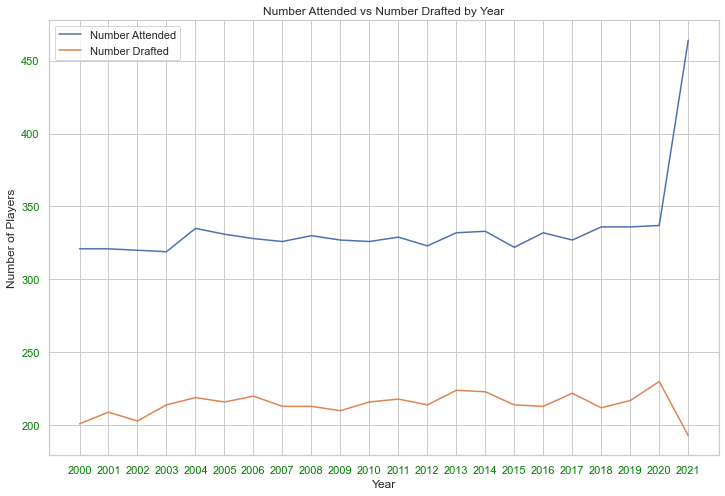

In [1803]:
number_drafted_by_year()

# There is clear indication that the year 2021 is an outlier. It was not a typical NFL Draft Combine due to the COVID-19 pandemic and thusly will be REMOVED

In [1768]:
#remove the data from 2021
def drop_2021(df):
    df = df[df.Year != 2021]
    return df

In [1805]:
nfl_combine_df = drop_2021(nfl_combine_df)
#verify that all rows for the year 2021 have been removed
nfl_combine_df.Year.unique()
nfl_combine_df

,Player,Pos,School,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Year,Drafted Team,Draft Round,Draft Pick,Draft Year,School_Value,Position_Value,Draft_Round_Value,Drafted
0,John Abraham\AbraJo00,OLB,South Carolina,76.0,252.0,4.55,NaN,NaN,NaN,NaN,NaN,2000,New York Jets,1st,13th pick,2000,1,1.0,1,1.0
1,Shaun Alexander\AlexSh00,RB,Alabama,72.0,218.0,4.58,NaN,NaN,NaN,NaN,NaN,2000,Seattle Seahawks,1st,19th pick,2000,1,2.0,1,1.0
2,Darnell Alford\AlfoDa20,OT,Boston Col.,76.0,334.0,5.56,25.0,23.0,94.0,8.48,4.98,2000,Kansas City Chiefs,6th,188th pick,2000,1,3.0,6,1.0
3,Kyle Allamon,TE,Texas Tech,74.0,253.0,4.97,29.0,NaN,104.0,7.29,4.49,2000,NaN,NaN,NaN,NaN,1,4.0,0,0.0
4,Rashard Anderson\AndeRa21,CB,Jackson State,74.0,206.0,4.55,34.0,NaN,123.0,7.18,4.15,2000,Carolina Panthers,1st,23rd pick,2000,3,5.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6886,D.J. Wonnum\WonnDJ00,DL,South Carolina,77.0,258.0,4.73,34.5,20.0,123.0,7.25,4.44,2020,Minnesota Vikings,4th,117th pick,2020,1,18.0,4,1.0
6887,Dom Wood-Anderson\WoodDo01,TE,Tennessee,76.0,261.0,4.92,35.0,NaN,119.0,NaN,NaN,2020,NaN,NaN,NaN,NaN,1,4.0,0,0.0
6888,David Woodward\WoodDa04,LB,Utah State,74.0,230.0,4.79,33.5,16.0,114.0,7.34,4.37,2020,NaN,NaN,NaN,NaN,2,20.0,0,0.0
6889,Chase Young\YounCh04,DL,Ohio State,77.0,264.0,NaN,NaN,NaN,NaN,NaN,NaN,2020,Washington Football Team,1st,2nd pick,2020,1,18.0,1,1.0


In [1807]:
nfl_combine_df.describe()

,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Year,School_Value,Position_Value,Draft_Round_Value,Drafted
count,6891.000000,6891.000000,6574.000000,5312.000000,4685.000000,5259.000000,4350.000000,4437.000000,6891.000000,6891.000000,6891.000000,6891.000000,6891.000000
mean,73.805398,243.209694,4.779854,32.890531,20.817289,114.335805,7.284175,4.393457,2010.064142,1.310115,8.692207,2.540125,0.656073
std,2.623773,45.034920,0.303746,4.206262,6.362176,9.334360,0.419684,0.267871,6.056455,0.603844,5.120439,2.423148,0.475051
min,65.000000,149.000000,4.220000,17.500000,2.000000,74.000000,6.280000,3.730000,2000.000000,1.000000,1.000000,0.000000,0.000000
25%,72.000000,206.000000,4.540000,30.000000,16.000000,109.000000,6.970000,4.200000,2005.000000,1.000000,4.000000,0.000000,0.000000
50%,74.000000,233.000000,4.700000,33.000000,21.000000,115.000000,7.190000,4.350000,2010.000000,1.000000,9.000000,2.000000,1.000000
75%,76.000000,280.000000,4.980000,36.000000,25.000000,121.000000,7.537500,4.560000,2015.000000,1.000000,13.000000,5.000000,1.000000
max,82.000000,375.000000,6.050000,46.000000,49.000000,147.000000,9.120000,5.560000,2020.000000,3.000000,22.000000,7.000000,1.000000


### Sort attendees into groups

In [1819]:
#sort players by player grouping with the current DF, the column to iterate through, and the list that belongs in the grouping
def sort_players(data, col, X):
    sorted_players = data.loc[data[col].isin(X)]
    sorted_players = sorted_players.reset_index(drop=True)
    return sorted_players

In [1820]:
#create new grouping DFs
offense = sort_players(nfl_combine_df,'Pos',['RB','OT','TE','OG','QB','WR','C','FB','OL'])
defense = sort_players(nfl_combine_df,'Pos',['OLB','CB','S','ILB','DE','DT','EDGE','DL','LB','DB'])
special_teams = sort_players(nfl_combine_df,'Pos',['K','P','LS'])
backs_receivers = sort_players(nfl_combine_df,'Pos',['RB','WR','FB','TE'])
offensive_linemen = sort_players(nfl_combine_df,'Pos',['OT','OG','C','OL'])
defensive_linemen = sort_players(nfl_combine_df,'Pos',['DE','DT','DL','EDGE'])
defensive_backs = sort_players(nfl_combine_df,'Pos',['S','CB','DB'])
line_backers = sort_players(nfl_combine_df,'Pos',['OLB','ILB','LB'])
kicking_specialists = sort_players(nfl_combine_df,'Pos',['K','P'])
other_specialists = sort_players(nfl_combine_df,'Pos',['LS'])
quarterbacks = sort_players(nfl_combine_df,'Pos',['QB'])
backs_receivers.head()

,Player,Pos,School,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Year,Drafted Team,Draft Round,Draft Pick,Draft Year,School_Value,Position_Value,Draft_Round_Value,Drafted
0,Shaun Alexander\AlexSh00,RB,Alabama,72.0,218.0,4.58,NaN,NaN,NaN,NaN,NaN,2000,Seattle Seahawks,1st,19th pick,2000,1,2.0,1,1.0
1,Kyle Allamon,TE,Texas Tech,74.0,253.0,4.97,29.0,NaN,104.0,7.29,4.49,2000,NaN,NaN,NaN,NaN,1,4.0,0,0.0
2,Anthony Becht\BechAn00,TE,West Virginia,78.0,270.0,4.78,33.5,NaN,123.0,6.94,4.08,2000,New York Jets,1st,27th pick,2000,1,4.0,1,1.0
3,Keith Brown,RB,UCLA,71.0,216.0,4.66,30.0,NaN,117.0,6.64,4.08,2000,NaN,NaN,NaN,NaN,1,2.0,0,0.0
4,Demario Brown,RB,Utah State,72.0,217.0,4.72,31.0,NaN,107.0,7.17,4.39,2000,NaN,NaN,NaN,NaN,2,2.0,0,0.0


In [1821]:
#print results and check that all players are accounted for
print('There are',len(offense),'offensive players.')
print('There are',len(defense),'defensive players.')
print('There are',len(special_teams),'special teams players.')
print('There are',len(quarterbacks),'quarterbacks.')
print('There are',len(backs_receivers),'backs and receivers.')
print('There are',len(offensive_linemen),'offensive linemen.')
print('There are',len(defensive_linemen),'defensive linemen.')
print('There are',len(defensive_backs),'defensive backs.')
print('There are',len(line_backers),'line backers.')
print('There are',len(kicking_specialists),'kickers and punters.')
print('There are',len(other_specialists),'long snappers.')

if len(offense)+len(defense)+len(special_teams) == len(nfl_combine_df) and len(quarterbacks)+len(backs_receivers)+len(offensive_linemen)+len(defensive_linemen)+len(defensive_backs)+len(line_backers)+len(kicking_specialists)+len(other_specialists) == len(nfl_combine_df):
    print('All players are accounted for.')
elif len(offense)+len(defense)+len(special_teams) == len(nfl_combine_df):
    print('The large groupings (offense,defense, and special teams) are accounted for and correct nut the smaller is not.')
elif len(quarterbacks)+len(backs_receivers)+len(offensive_linemen)+len(defensive_linemen)+len(defensive_backs)+len(line_backers)+len(kicking_specialists)+len(other_specialists) == len(nfl_combine_df):
    print('The smaller groupings are accounted for and correct but the larger is not.')
else:
    print('Neither grouping is correct.')

There are 3557 offensive players.
There are 3090 defensive players.
There are 244 special teams players.
There are 384 quarterbacks.
There are 2053 backs and receivers.
There are 1120 offensive linemen.
There are 1080 defensive linemen.
There are 1227 defensive backs.
There are 783 line backers.
There are 221 kickers and punters.
There are 23 long snappers.
All players are accounted for.


### Sort attendees into positions

In [1822]:
#group all players into DF by Position
position_df = nfl_combine_df.groupby('Pos')

rb_df= position_df.get_group('RB')
de_df= position_df.get_group('DE')
og_df= position_df.get_group('OG')
olb_df= position_df.get_group('OLB')
dt_df= position_df.get_group('DT')
ot_df= position_df.get_group('OT')
cb_df= position_df.get_group('CB')
te_df= position_df.get_group('TE')
ilb_df= position_df.get_group('ILB')
c_df= position_df.get_group('C')
fb_df= position_df.get_group('FB')
wr_df= position_df.get_group('WR')
p_df= position_df.get_group('P')
k_df= position_df.get_group('K')
qb_df= position_df.get_group('QB')
ls_df= position_df.get_group('LS')
s_df= position_df.get_group('S')
db_df= position_df.get_group('DB')
edge_df= position_df.get_group('EDGE')
dl_df= position_df.get_group('DL')
lb_df= position_df.get_group('LB')
ol_df= position_df.get_group('OL')

In [1823]:
#use length to check to see if all players are accounted for
print(len(rb_df)+len(de_df)+len(og_df)+len(olb_df)+len(dt_df)+len(ot_df)+len(cb_df)+len(te_df)+len(ilb_df)+len(c_df)+len(fb_df)+len(wr_df)+len(p_df)+len(k_df)+len(qb_df)+len(ls_df)+len(s_df)+len(db_df)+len(edge_df)+len(dl_df)+len(lb_df)+len(ol_df))
len(nfl_combine_df)

6891


6891

# Graph the percentage of attendees to attendees who were drafted

### Graph of the percentage of the overall groupings

In [1815]:
#bar graph that shows percent drafted by overall grouping (offense, defense, and special teams)
def percent_drafted_by_overall_grouping():
    import matplotlib.pyplot as plt
    from matplotlib.pyplot import figure
    plt.figure(figsize=(12, 8))

    # Choose the height of the bars
    height = [(offense.Drafted.sum() / len(offense) * 100), 
              (defense.Drafted.sum() / len(defense) * 100),
              (special_teams.Drafted.sum() / len(special_teams) * 100),
              (nfl_combine_df.Drafted.sum() / len(nfl_combine_df) * 100)]
              

    # Choose the names of the bars
    position = ('Offense', 'Defense','Special Teams','Overall')
    x = np.arange(len(position))

    # Create bars
    plt.bar(x, height)

    # Create names on the x-axis
    plt.xticks(x, position, color='green')
    plt.yticks(color='green')
    plt.title('Percentage of Drafted by Overall Grouping')
    plt.xlabel('Grouping')
    plt.ylabel('Percentage')

# Show graphic
    return plt.show()

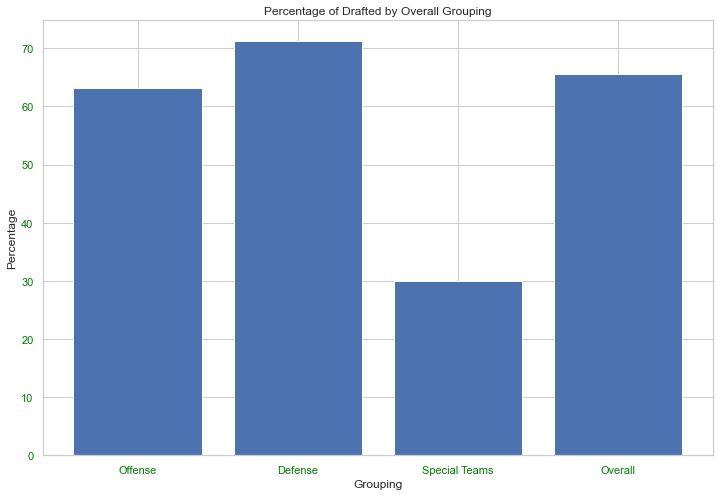

In [1816]:
percent_drafted_by_overall_grouping()

### Graph of the percentage of the smaller groupings

In [1824]:
#bar graph that shows percent drafted by overall grouping (offense, defense, and special teams)
def percent_drafted_by_grouping():
    import matplotlib.pyplot as plt
    from matplotlib.pyplot import figure
    plt.figure(figsize=(16, 8))

    # Choose the height of the bars
    height = [(backs_receivers.Drafted.sum() / len(backs_receivers) * 100), 
              (offensive_linemen.Drafted.sum() / len(offensive_linemen) * 100),
              (quarterbacks.Drafted.sum() / len(quarterbacks) * 100),
              (defensive_linemen.Drafted.sum() / len(defensive_linemen) * 100),
              (defensive_backs.Drafted.sum() / len(defensive_backs) * 100),
              (line_backers.Drafted.sum() / len(line_backers) * 100),
              ((kicking_specialists.Drafted.sum()+other_specialists.Drafted.sum()) / (len(kicking_specialists) + len(other_specialists)) * 100),
              (nfl_combine_df.Drafted.sum() / len(nfl_combine_df) * 100)]
              

    # Choose the names of the bars
    position = ('Backs and Receivers', 'Offensive Linemen','Quarterbacks','Defensive Linemen','Defensive Backs','Line Backers','Specialists','Overall')
    x = np.arange(len(position))

    # Create bars
    plt.bar(x, height)

    # Create names on the x-axis
    plt.xticks(x, position, color='green')
    plt.yticks(color='green')
    plt.title('Percentage of Drafted by Grouping')
    plt.xlabel('Grouping')
    plt.ylabel('Percentage')

# Show graphic
    return plt.show()

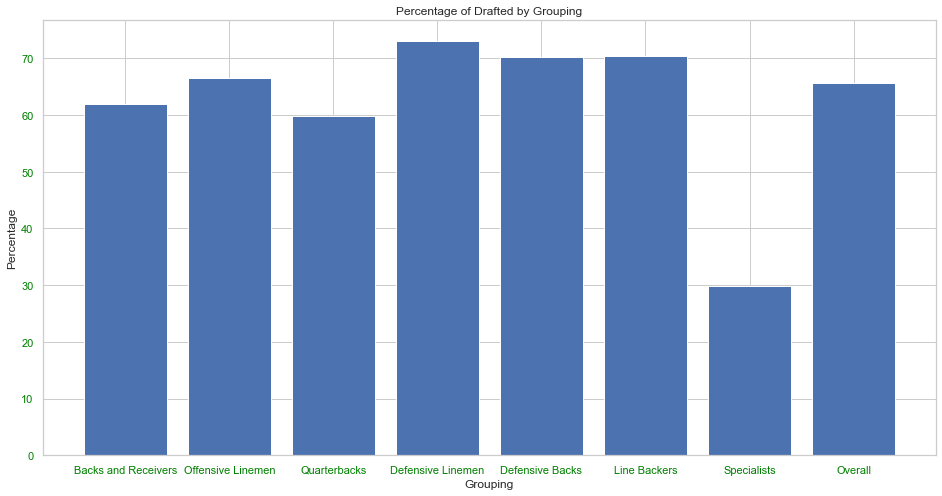

In [1825]:
percent_drafted_by_grouping()

### Graph of the percentage by position

In [1826]:
#bar graph with percent drafted by position grouping
def percent_drafted_by_position():
    import matplotlib.pyplot as plt
    from matplotlib.pyplot import figure
    plt.figure(figsize=(12, 8))

    # Choose the height of the bars
    height = [(rb_df.Drafted.sum() / len(rb_df) * 100), 
              (de_df.Drafted.sum() / len(de_df) * 100),
              (og_df.Drafted.sum() / len(og_df) * 100),
              (olb_df.Drafted.sum() / len(olb_df) * 100),
              (dt_df.Drafted.sum() / len(dt_df) * 100),
              (ot_df.Drafted.sum() / len(ot_df) * 100),
              (cb_df.Drafted.sum() / len(cb_df) * 100),
              (te_df.Drafted.sum() / len(te_df) * 100),
              (ilb_df.Drafted.sum() / len(ilb_df) * 100),
              (c_df.Drafted.sum() / len(c_df) * 100),
              (fb_df.Drafted.sum() / len(fb_df) * 100),
              (wr_df.Drafted.sum() / len(wr_df) * 100),
              (p_df.Drafted.sum() / len(p_df) * 100),
              (k_df.Drafted.sum() / len(k_df) * 100),
              (qb_df.Drafted.sum() / len(qb_df) * 100),
              (ls_df.Drafted.sum()/ len(ls_df) * 100),
              (s_df.Drafted.sum()/ len(s_df) * 100),
              (db_df.Drafted.sum()/ len(db_df) * 100),
              (edge_df.Drafted.sum() / len(edge_df) * 100),
              (dl_df.Drafted.sum() / len(dl_df) * 100),
              (lb_df.Drafted.sum() / len(lb_df) * 100),
              (ol_df.Drafted.sum() / len(ol_df) * 100),
              (nfl_combine_df.Drafted.sum() / len(nfl_combine_df) * 100)]
              

    # Choose the names of the bars
    position = ('RB', 'DE', 'OG', 'OLB', 'DT', 'OT', 'CB', 'TE', 'ILB', 'C', 'FB', 'WR', 'P', 'K', 'QB', 'LS', 'S', 'DB','EDGE','DL','LB','OL','Overall')
    x = np.arange(len(position))

    # Create bars
    plt.bar(x, height)

    # Create names on the x-axis
    plt.xticks(x, position, color='green')
    plt.yticks(color='green')
    plt.title('Percentage of Drafted by Position')
    plt.xlabel('Position')
    plt.ylabel('Percentage')

# Show graphic
    return plt.show()

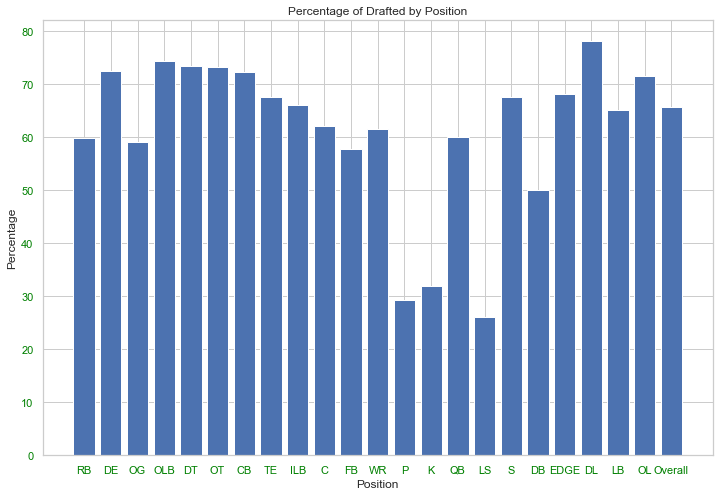

In [1827]:
percent_drafted_by_position()

# Other graphs to visualize the data

In [1828]:
#bar plot to find the number of players drafted by positional group
def number_drafted_by_position():
    import matplotlib.pyplot as plt
    from matplotlib.pyplot import figure
    plt.figure(figsize=(12, 8))

    # Choose the height of the bars
    height = [(rb_df.Drafted.sum()), 
              (de_df.Drafted.sum()), 
              (og_df.Drafted.sum()), 
              (olb_df.Drafted.sum()), 
              (dt_df.Drafted.sum()), 
              (ot_df.Drafted.sum()), 
              (cb_df.Drafted.sum()), 
              (te_df.Drafted.sum()),
              (ilb_df.Drafted.sum()),
              (c_df.Drafted.sum()),
              (fb_df.Drafted.sum()),
              (wr_df.Drafted.sum()),
              (p_df.Drafted.sum()),
              (k_df.Drafted.sum()),
              (qb_df.Drafted.sum()),
              (ls_df.Drafted.sum()),
              (s_df.Drafted.sum()),
              (db_df.Drafted.sum()),
              (edge_df.Drafted.sum()),
              (dl_df.Drafted.sum()),
              (lb_df.Drafted.sum()),
              (ol_df.Drafted.sum())]
              

    # Choose the names of the bars
    position = ('RB', 'DE', 'OG', 'OLB', 'DT', 'OT', 'CB', 'TE', 'ILB', 'C', 'FB', 'WR', 'P', 'K', 'QB', 'LS', 'S', 'DB','EDGE','DL','LB','OL')
    x = np.arange(len(position))

    # Create bars
    plt.bar(x, height)

    # Create names on the x-axis
    plt.xticks(x, position, color='green')
    plt.yticks(color='green')
    plt.title('Number of Drafted Players by Position')
    plt.xlabel('Position')
    plt.ylabel('Total Number of Drafted Players')

# Show graphic
    return plt.show()

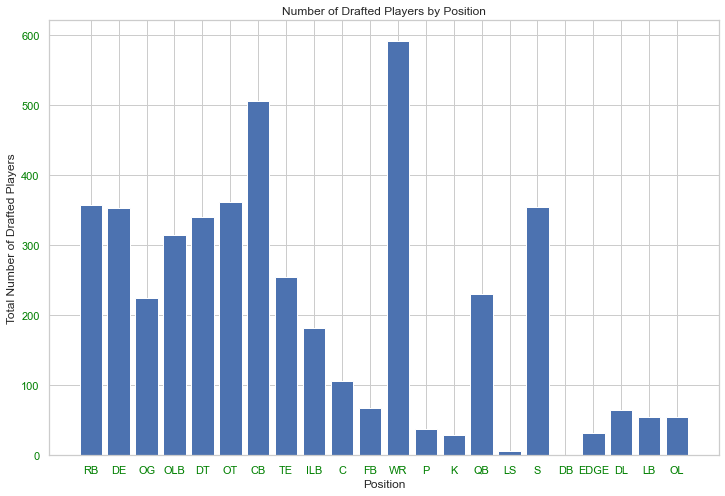

In [1829]:
number_drafted_by_position()

In [1830]:
#pie chart of players drafted by large grouping
def large_grouped_players_drafted():
    # library
    import matplotlib.pyplot as plt
    
    # create groupings
    names=['Offensive Players', 'Defensive Players', 'Special Teams']
    values=[offense.Drafted.sum(),
            defense.Drafted.sum(),
            special_teams.Drafted.sum()]
    colors = ['#004C54','#A5ACAF','#565A5C']
    
    # Label distance: gives the space between labels and the center of the pie
    plt.pie(values, labels=names, labeldistance=1.15, wedgeprops = { 'linewidth' : 1.5, 'edgecolor' : 'white' }, colors=colors);
    return plt.show();


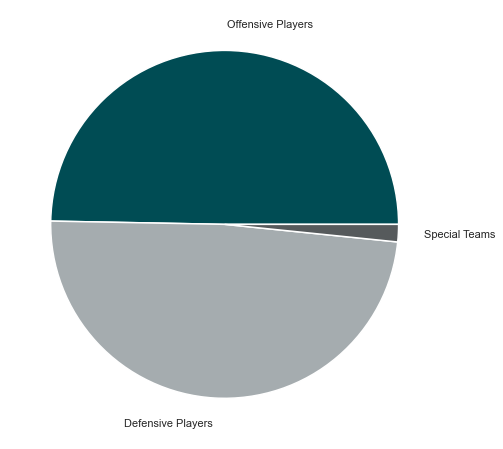

In [1831]:
large_grouped_players_drafted()

In [1832]:
#pie chart of players drafted by player type, smaller grouping
def small_grouped_players_drafted():
    # library
    import matplotlib.pyplot as plt
    
    # create random data
    names=['Backs and Receivers', 'Quarterbacks', 'Offensive Linemen', 'Defensive Linemen', 'Defensive Backs', 'Line Backers', 'Specialists']
    values=[backs_receivers.Drafted.sum(),
            quarterbacks.Drafted.sum(),
            offensive_linemen.Drafted.sum(),
            defensive_linemen.Drafted.sum(),
            defensive_backs.Drafted.sum(),
            line_backers.Drafted.sum(),
            kicking_specialists.Drafted.sum()+other_specialists.Drafted.sum()]
    colors = ['#004C54','#A5ACAF','#565A5C','#ACC0C6','#000000','#046A38','#27251F']
    
    # Label distance: gives the space between labels and the center of the pie
    plt.pie(values, labels=names, labeldistance=1.15, wedgeprops = { 'linewidth' : 1.5, 'edgecolor' : 'white' }, colors=colors);
    return plt.show();


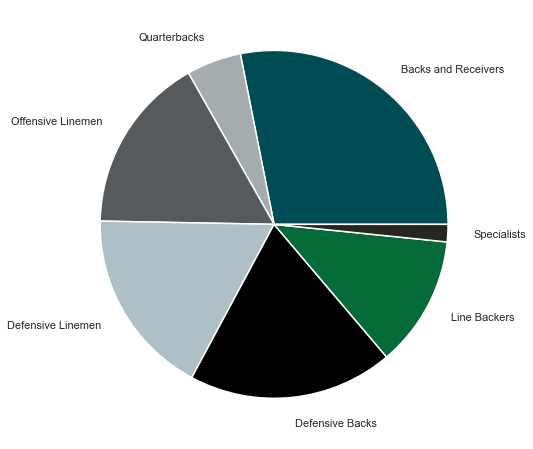

In [1833]:
small_grouped_players_drafted()

In [1834]:
#pie chart with player groups by percentage drafted
def percent_drafted_by_position_pie():
    # library
    import matplotlib.pyplot as plt
    
    # create random data
    names=['Backs and Receivers', 'Quarterbacks', 'Offensive Linemen', 'Defensive Linemen', 'Defensive Backs', 'Line Backers', 'Specialists']
    values=[backs_receivers.Drafted.sum()/len(backs_receivers)*100,
            quarterbacks.Drafted.sum()/len(quarterbacks)*100,
            offensive_linemen.Drafted.sum()/len(offensive_linemen)*100,
            defensive_linemen.Drafted.sum()/len(defensive_linemen)*100,
            defensive_backs.Drafted.sum()/len(defensive_backs)*100,
            line_backers.Drafted.sum()/len(line_backers)*100,
            (kicking_specialists.Drafted.sum()+other_specialists.Drafted.sum())/(len(kicking_specialists)+len(other_specialists))*100] 
    colors = ['#004C54','#A5ACAF','#565A5C','#ACC0C6','#000000']
    
    # Label distance: gives the space between labels and the center of the pie
    plt.pie(values, labels=names, labeldistance=1.15, wedgeprops = { 'linewidth' : 1.5, 'edgecolor' : 'white' }, colors=colors);
    return plt.show();


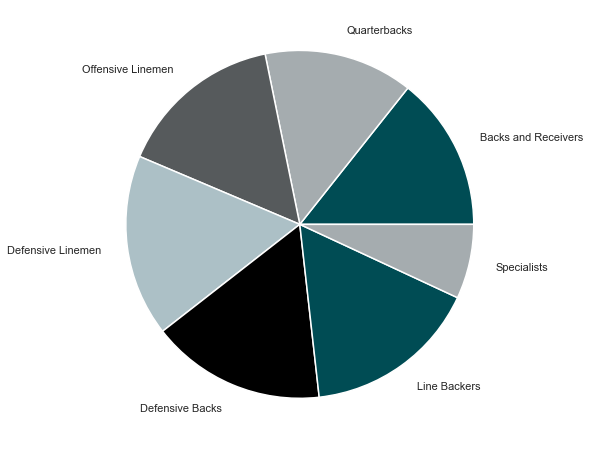

In [1835]:
percent_drafted_by_position_pie()

# Create grouping of Drafted Attendees and Undrafted Attendees

In [1838]:
#sperated players by draft status
nfl_combine_drafted = nfl_combine_drafted.iloc[0:0]
nfl_combine_drafted = nfl_combine_df.copy()
nfl_combine_drafted = nfl_combine_df[nfl_combine_df.Drafted == 1]
nfl_combine_drafted.reset_index(inplace=True, drop=True)
print(nfl_combine_drafted.columns)
print(nfl_combine_drafted.Drafted.unique())
nfl_combine_drafted.head()


Index(['Player', 'Pos', 'School', 'Ht', 'Wt', '40yd', 'Vertical', 'Bench',
       'Broad Jump', '3Cone', 'Shuttle', 'Year', 'Drafted Team', 'Draft Round',
       'Draft Pick', 'Draft Year', 'School_Value', 'Position_Value',
       'Draft_Round_Value', 'Drafted'],
      dtype='object')
[1.]


,Player,Pos,School,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Year,Drafted Team,Draft Round,Draft Pick,Draft Year,School_Value,Position_Value,Draft_Round_Value,Drafted
0,John Abraham\AbraJo00,OLB,South Carolina,76.0,252.0,4.55,NaN,NaN,NaN,NaN,NaN,2000,New York Jets,1st,13th pick,2000,1,1.0,1,1.0
1,Shaun Alexander\AlexSh00,RB,Alabama,72.0,218.0,4.58,NaN,NaN,NaN,NaN,NaN,2000,Seattle Seahawks,1st,19th pick,2000,1,2.0,1,1.0
2,Darnell Alford\AlfoDa20,OT,Boston Col.,76.0,334.0,5.56,25.0,23.0,94.0,8.48,4.98,2000,Kansas City Chiefs,6th,188th pick,2000,1,3.0,6,1.0
3,Rashard Anderson\AndeRa21,CB,Jackson State,74.0,206.0,4.55,34.0,NaN,123.0,7.18,4.15,2000,Carolina Panthers,1st,23rd pick,2000,3,5.0,1,1.0
4,LaVar Arrington\ArriLa00,OLB,Penn State,75.0,250.0,4.53,NaN,NaN,NaN,NaN,NaN,2000,Washington Redskins,1st,2nd pick,2000,1,1.0,1,1.0


In [1839]:
#sperated players by draft status
nfl_combine_undrafted = nfl_combine_df[nfl_combine_df.Drafted ==0]
nfl_combine_undrafted.reset_index(inplace=True, drop=True)
nfl_combine_undrafted.head()#describe().transpose()

,Player,Pos,School,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Year,Drafted Team,Draft Round,Draft Pick,Draft Year,School_Value,Position_Value,Draft_Round_Value,Drafted
0,Kyle Allamon,TE,Texas Tech,74.0,253.0,4.97,29.0,NaN,104.0,7.29,4.49,2000,NaN,NaN,NaN,NaN,1,4.0,0,0.0
1,Jake Arians\arianjak01,K,Ala-Birmingham,70.0,202.0,NaN,NaN,NaN,NaN,NaN,NaN,2000,NaN,NaN,NaN,NaN,2,6.0,0,0.0
2,Corey Atkins\AtkiCo20,OLB,South Carolina,72.0,237.0,4.72,31.0,21.0,112.0,7.96,4.39,2000,NaN,NaN,NaN,NaN,1,1.0,0,0.0
3,Kyle Atteberry,K,Baylor,72.0,167.0,NaN,NaN,NaN,NaN,NaN,NaN,2000,NaN,NaN,NaN,NaN,1,6.0,0,0.0
4,John Baker\BakeJo21,P,North Texas,75.0,227.0,NaN,NaN,NaN,NaN,NaN,NaN,2000,NaN,NaN,NaN,NaN,2,7.0,0,0.0


In [1840]:
#print the labels used for Draft Round
print(nfl_combine_drafted["Draft Round"].unique())

[' 1st ' ' 6th ' ' 4th ' ' 7th ' ' 2nd ' ' 5th ' ' 3rd ']


# Create another grouping based on the round they were drafted in

In [1841]:
#seperate players by which round they are picked in
first_round_pick = nfl_combine_drafted[nfl_combine_drafted.Draft_Round_Value == 1]
second_round_pick = nfl_combine_drafted[nfl_combine_drafted.Draft_Round_Value == 2]
third_round_pick = nfl_combine_drafted[nfl_combine_drafted.Draft_Round_Value == 3]
fourth_round_pick = nfl_combine_drafted[nfl_combine_drafted.Draft_Round_Value == 4]
fifth_round_pick = nfl_combine_drafted[nfl_combine_drafted.Draft_Round_Value == 5]
sixth_round_pick = nfl_combine_drafted[nfl_combine_drafted.Draft_Round_Value == 6]
seventh_round_pick = nfl_combine_drafted[nfl_combine_drafted.Draft_Round_Value == 7]
print(first_round_pick.Draft_Round_Value.unique(),second_round_pick.Draft_Round_Value.unique(),third_round_pick.Draft_Round_Value.unique(),fourth_round_pick.Draft_Round_Value.unique(),fifth_round_pick.Draft_Round_Value.unique(),sixth_round_pick.Draft_Round_Value.unique(),seventh_round_pick.Draft_Round_Value.unique())
first_round_pick.head()


[1] [2] [3] [4] [5] [6] [7]


,Player,Pos,School,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Year,Drafted Team,Draft Round,Draft Pick,Draft Year,School_Value,Position_Value,Draft_Round_Value,Drafted
0,John Abraham\AbraJo00,OLB,South Carolina,76.0,252.0,4.55,NaN,NaN,NaN,NaN,NaN,2000,New York Jets,1st,13th pick,2000,1,1.0,1,1.0
1,Shaun Alexander\AlexSh00,RB,Alabama,72.0,218.0,4.58,NaN,NaN,NaN,NaN,NaN,2000,Seattle Seahawks,1st,19th pick,2000,1,2.0,1,1.0
3,Rashard Anderson\AndeRa21,CB,Jackson State,74.0,206.0,4.55,34.0,NaN,123.0,7.18,4.15,2000,Carolina Panthers,1st,23rd pick,2000,3,5.0,1,1.0
4,LaVar Arrington\ArriLa00,OLB,Penn State,75.0,250.0,4.53,NaN,NaN,NaN,NaN,NaN,2000,Washington Redskins,1st,2nd pick,2000,1,1.0,1,1.0
11,Anthony Becht\BechAn00,TE,West Virginia,78.0,270.0,4.78,33.5,NaN,123.0,6.94,4.08,2000,New York Jets,1st,27th pick,2000,1,4.0,1,1.0


## Graph the players drafted by round

In [1842]:
#bar chart of players drafted by round
def number_drafted_by_round():
    import matplotlib.pyplot as plt
    from matplotlib.pyplot import figure
    plt.figure(figsize=(12, 8))

    # Choose the height of the bars
    height = [len(first_round_pick),
             len(second_round_pick),
             len(third_round_pick),
             len(fourth_round_pick),
             len(fifth_round_pick),
             len(sixth_round_pick),
             len(seventh_round_pick)]
              

    # Choose the names of the bars
    position = ('First Round', 'Second Round', 'Third Round', 'Fourth Round', 'Fifth Round', 'Sixth Round', 'Seventh Round')
    x = np.arange(len(position))

    # Create bars
    plt.bar(x, height)

    # Adjust axis settings and names
    plt.xticks(x, position, color='green')
    plt.yticks(color='green')
    plt.title('Number of Drafted Players by Round')
    plt.xlabel('Round')
    plt.ylabel('Number of Players')

# Show graphic
    return plt.show()

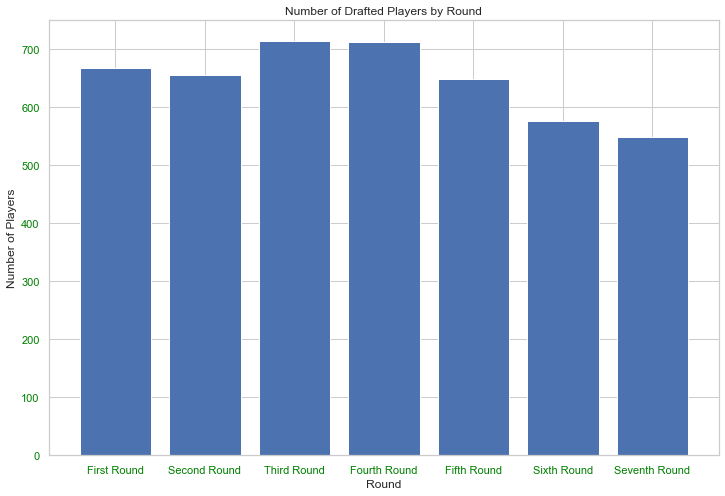

In [1843]:
number_drafted_by_round()

In [1863]:
#bar chart of players drafted by round
def percent_drafted_by_round():
    import matplotlib.pyplot as plt
    from matplotlib.pyplot import figure
    plt.figure(figsize=(12, 8))

    # Choose the height of the bars
    height = [len(first_round_pick)/len(nfl_combine_df)*100,
             len(second_round_pick)/len(nfl_combine_df)*100,
             len(third_round_pick)/len(nfl_combine_df)*100,
             len(fourth_round_pick)/len(nfl_combine_df)*100,
             len(fifth_round_pick)/len(nfl_combine_df)*100,
             len(sixth_round_pick)/len(nfl_combine_df)*100,
             len(seventh_round_pick)/len(nfl_combine_df)*100]
              

    # Choose the names of the bars
    position = ('First Round', 'Second Round', 'Third Round', 'Fourth Round', 'Fifth Round', 'Sixth Round', 'Seventh Round')
    x = np.arange(len(position))

    # Create bars
    plt.bar(x, height)

    # Adjust axis settings and names
    plt.xticks(x, position, color='green')
    plt.yticks(color='green')
    plt.title('Percent of Drafted Players by Round')
    plt.xlabel('Round')
    plt.ylabel('Percent of Players')

# Show graphic
    return plt.show()

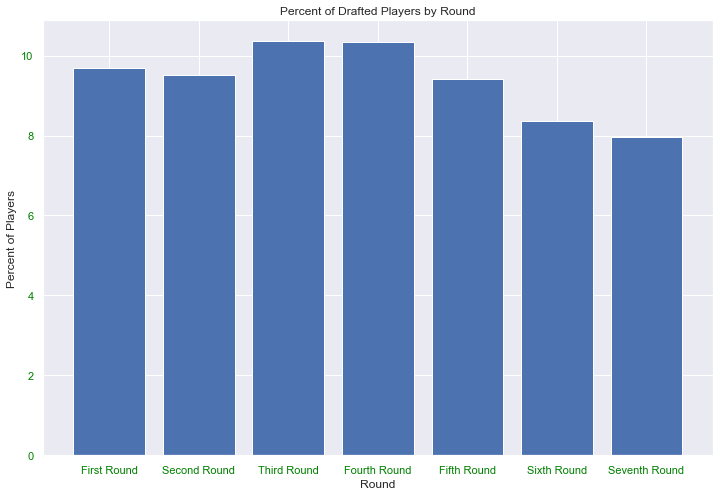

In [1864]:
percent_drafted_by_round()

## Evaluate how many attendees did not participate in certain tests

In [1866]:
#evaluate drafted players and the tests they did not particiapate in
print(len(nfl_combine_drafted),'combine atendees have been drafted from 2000-2020.')
print(nfl_combine_drafted['40yd'].isna().sum(),'attendees did not participate in the 40 yard dash.')
print(nfl_combine_drafted.Vertical.isna().sum(),'attendees did not participate in the vertical jump.')
print(nfl_combine_drafted.Bench.isna().sum(),'attendees did not participate in the bench press.')
print(nfl_combine_drafted['Broad Jump'].isna().sum(),'attendees did not participate in the broad jump.')
print(nfl_combine_drafted['3Cone'].isna().sum(),'attendees did not participate in the 3 cone test.')
print(nfl_combine_drafted.Shuttle.isna().sum(),'attendees did not participate in the shuttle run.')

4521 combine atendees have been drafted from 2000-2020.
186 attendees did not participate in the 40 yard dash.
976 attendees did not participate in the vertical jump.
1362 attendees did not participate in the bench press.
1016 attendees did not participate in the broad jump.
1604 attendees did not participate in the 3 cone test.
1554 attendees did not participate in the shuttle run.


In [1873]:
#line graph of the percent of players fer DF that DID NOT particiapte in certain tests
def percent_not_participating(df,df2):
    import matplotlib.pyplot as plt
    from matplotlib.pyplot import figure
    
    overall=[df['40yd'].isna().sum()/len(df)*100,
       df.Vertical.isna().sum()/len(df)*100,
       df.Bench.isna().sum()/len(df)*100,
       df['Broad Jump'].isna().sum()/len(df)*100,
       df['3Cone'].isna().sum()/len(df)*100,
       df.Shuttle.isna().sum()/len(df)*100]
    
    drafted=[df2['40yd'].isna().sum()/len(df2)*100,
       df2.Vertical.isna().sum()/len(df2)*100,
       df2.Bench.isna().sum()/len(df2)*100,
       df2['Broad Jump'].isna().sum()/len(df2)*100,
       df2['3Cone'].isna().sum()/len(df2)*100,
       df2.Shuttle.isna().sum()/len(df2)*100]
       
  
        
    x=['40 Yard Dash','Veritcal Jump','Bench Press','Broad Jump', '3 Cone Test','Shuttle Run']
    
    fig = plt.subplots(figsize=(12, 8))
    
    plt.plot(x,overall, label="Number Attended")
    plt.plot(x,drafted, label="Number Drafted")
    
    plt.legend()
    
    
    # Create names on the x-axis
    plt.xticks(color='green')
    plt.yticks(color='green')
    plt.title('Percent of players not participating by Test')
    plt.xlabel('Test')
    plt.ylabel('percent')

    # Show graphic
    return plt.show()

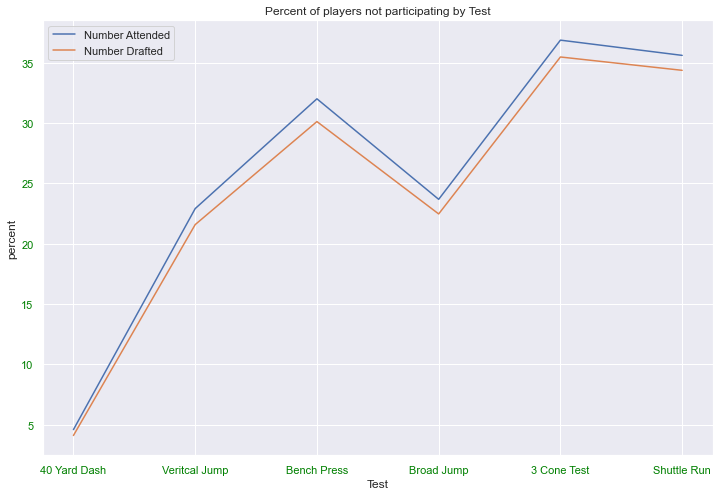

In [1874]:
percent_not_participating(nfl_combine_df, nfl_combine_drafted)

### create a new column that has a string 'Yes' if drafted, 'No' if not

In [1876]:
  #df['School_Value']=df['School'].apply(lambda x: 1 if x in power else (2 if x in group else 3))
nfl_combine_df['Drafted_String']=nfl_combine_df.Drafted.apply(lambda x: 'Yes' if x == 1 else 'No')
nfl_combine_df

,Player,Pos,School,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,...,Year,Drafted Team,Draft Round,Draft Pick,Draft Year,School_Value,Position_Value,Draft_Round_Value,Drafted,Drafted_String
0,John Abraham\AbraJo00,OLB,South Carolina,76.0,252.0,4.55,NaN,NaN,NaN,NaN,...,2000,New York Jets,1st,13th pick,2000,1,1.0,1,1.0,Yes
1,Shaun Alexander\AlexSh00,RB,Alabama,72.0,218.0,4.58,NaN,NaN,NaN,NaN,...,2000,Seattle Seahawks,1st,19th pick,2000,1,2.0,1,1.0,Yes
2,Darnell Alford\AlfoDa20,OT,Boston Col.,76.0,334.0,5.56,25.0,23.0,94.0,8.48,...,2000,Kansas City Chiefs,6th,188th pick,2000,1,3.0,6,1.0,Yes
3,Kyle Allamon,TE,Texas Tech,74.0,253.0,4.97,29.0,NaN,104.0,7.29,...,2000,NaN,NaN,NaN,NaN,1,4.0,0,0.0,No
4,Rashard Anderson\AndeRa21,CB,Jackson State,74.0,206.0,4.55,34.0,NaN,123.0,7.18,...,2000,Carolina Panthers,1st,23rd pick,2000,3,5.0,1,1.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6886,D.J. Wonnum\WonnDJ00,DL,South Carolina,77.0,258.0,4.73,34.5,20.0,123.0,7.25,...,2020,Minnesota Vikings,4th,117th pick,2020,1,18.0,4,1.0,Yes
6887,Dom Wood-Anderson\WoodDo01,TE,Tennessee,76.0,261.0,4.92,35.0,NaN,119.0,NaN,...,2020,NaN,NaN,NaN,NaN,1,4.0,0,0.0,No
6888,David Woodward\WoodDa04,LB,Utah State,74.0,230.0,4.79,33.5,16.0,114.0,7.34,...,2020,NaN,NaN,NaN,NaN,2,20.0,0,0.0,No
6889,Chase Young\YounCh04,DL,Ohio State,77.0,264.0,NaN,NaN,NaN,NaN,NaN,...,2020,Washington Football Team,1st,2nd pick,2020,1,18.0,1,1.0,Yes


# Scale the data to prepare it for training and testing

In [1888]:
def scale_df(df):
    #call library to scale
    import seaborn as sns
    from sklearn.preprocessing import MinMaxScaler
    #filter the correct columns to be scaled
    filtered_df = df[['Ht','Wt','40yd','Vertical','Bench','Broad Jump','3Cone','Shuttle','School_Value','Position_Value','Draft_Round_Value']]
    
    scaler = MinMaxScaler()
 
    df_scaled = scaler.fit_transform(filtered_df.to_numpy())
    df_scaled = pd.DataFrame(df_scaled, columns=['Ht','Wt','40yd','Vertical','Bench','Broad Jump','3Cone','Shuttle','School_Value','Position_Value','Draft_Round_Value'])

    return df_scaled
    

In [1889]:
scaled_nfl_combine_df = scale_df(nfl_combine_df)
scaled_nfl_combine_df.describe()


,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,School_Value,Position_Value,Draft_Round_Value
count,6891.000000,6891.000000,6574.000000,5312.000000,4685.000000,5259.000000,4350.000000,4437.000000,6891.000000,6891.000000,6891.000000
mean,0.517965,0.416857,0.305931,0.540019,0.400368,0.552545,0.353583,0.362545,0.155057,0.366296,0.362875
std,0.154340,0.199270,0.165981,0.147588,0.135365,0.127868,0.147776,0.146378,0.301922,0.243830,0.346164
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.411765,0.252212,0.174863,0.438596,0.297872,0.479452,0.242958,0.256831,0.000000,0.142857,0.000000
50%,0.529412,0.371681,0.262295,0.543860,0.404255,0.561644,0.320423,0.338798,0.000000,0.380952,0.285714
75%,0.647059,0.579646,0.415301,0.649123,0.489362,0.643836,0.442782,0.453552,0.000000,0.571429,0.714286
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1890]:
#add 'Drafted_String' back onto scaled DF
scaled_nfl_combine_df[['Pos','Drafted']] = nfl_combine_df[['Pos','Drafted']]
scaled_nfl_combine_df.head()
#scaled_nfl_combine_df.isna().sum()

,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,School_Value,Position_Value,Draft_Round_Value,Pos,Drafted
0,0.647059,0.455752,0.180328,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.142857,OLB,1.0
1,0.411765,0.305310,0.196721,NaN,NaN,NaN,NaN,NaN,0.0,0.047619,0.142857,RB,1.0
2,0.647059,0.818584,0.732240,0.263158,0.446809,0.273973,0.774648,0.683060,0.0,0.095238,0.857143,OT,1.0
3,0.529412,0.460177,0.409836,0.403509,NaN,0.410959,0.355634,0.415301,0.0,0.142857,0.000000,TE,0.0
4,0.529412,0.252212,0.180328,0.578947,NaN,0.671233,0.316901,0.229508,1.0,0.190476,0.142857,CB,1.0


In [1891]:
scaled_backs_receivers = scale_df(backs_receivers)
scaled_backs_receivers
#backs_receivers.head()

,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,School_Value,Position_Value,Draft_Round_Value
0,0.466667,0.368984,0.330275,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.142857
1,0.600000,0.556150,0.688073,0.200,NaN,0.139535,0.443878,0.678571,0.0,0.142857,0.000000
2,0.866667,0.647059,0.513761,0.425,NaN,0.581395,0.265306,0.312500,0.0,0.142857,0.142857
3,0.400000,0.358289,0.403670,0.250,NaN,0.441860,0.112245,0.312500,0.0,0.000000,0.000000
4,0.466667,0.363636,0.458716,0.300,NaN,0.209302,0.382653,0.589286,0.5,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2048,0.466667,0.192513,0.119266,0.575,NaN,0.627907,0.438776,0.562500,0.5,0.857143,0.857143
2049,0.666667,0.363636,0.403670,0.525,NaN,0.511628,0.392857,0.705357,0.0,0.857143,0.000000
2050,0.666667,0.524064,0.605505,0.300,NaN,0.325581,0.484694,0.625000,0.5,0.142857,0.000000
2051,0.800000,0.508021,0.513761,0.475,0.529412,0.511628,0.387755,0.651786,0.0,0.142857,0.857143


In [1892]:
#add 'Drafted_String' back onto scaled DF
scaled_backs_receivers['Drafted'] =backs_receivers.Drafted.apply(lambda x: 'Yes' if x == 1 else 'No')
scaled_backs_receivers

,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,School_Value,Position_Value,Draft_Round_Value,Drafted
0,0.466667,0.368984,0.330275,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.142857,Yes
1,0.600000,0.556150,0.688073,0.200,NaN,0.139535,0.443878,0.678571,0.0,0.142857,0.000000,No
2,0.866667,0.647059,0.513761,0.425,NaN,0.581395,0.265306,0.312500,0.0,0.142857,0.142857,Yes
3,0.400000,0.358289,0.403670,0.250,NaN,0.441860,0.112245,0.312500,0.0,0.000000,0.000000,No
4,0.466667,0.363636,0.458716,0.300,NaN,0.209302,0.382653,0.589286,0.5,0.000000,0.000000,No
...,...,...,...,...,...,...,...,...,...,...,...,...
2048,0.466667,0.192513,0.119266,0.575,NaN,0.627907,0.438776,0.562500,0.5,0.857143,0.857143,Yes
2049,0.666667,0.363636,0.403670,0.525,NaN,0.511628,0.392857,0.705357,0.0,0.857143,0.000000,No
2050,0.666667,0.524064,0.605505,0.300,NaN,0.325581,0.484694,0.625000,0.5,0.142857,0.000000,No
2051,0.800000,0.508021,0.513761,0.475,0.529412,0.511628,0.387755,0.651786,0.0,0.142857,0.857143,Yes


In [1893]:
schools_list = nfl_combine_df.School.unique()
schools_list.sort()

In [1896]:
#print(nfl_combine_df.columns)
nfl_combine_df

,Player,Pos,School,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,...,Year,Drafted Team,Draft Round,Draft Pick,Draft Year,School_Value,Position_Value,Draft_Round_Value,Drafted,Drafted_String
0,John Abraham\AbraJo00,OLB,South Carolina,76.0,252.0,4.55,NaN,NaN,NaN,NaN,...,2000,New York Jets,1st,13th pick,2000,1,1.0,1,1.0,Yes
1,Shaun Alexander\AlexSh00,RB,Alabama,72.0,218.0,4.58,NaN,NaN,NaN,NaN,...,2000,Seattle Seahawks,1st,19th pick,2000,1,2.0,1,1.0,Yes
2,Darnell Alford\AlfoDa20,OT,Boston Col.,76.0,334.0,5.56,25.0,23.0,94.0,8.48,...,2000,Kansas City Chiefs,6th,188th pick,2000,1,3.0,6,1.0,Yes
3,Kyle Allamon,TE,Texas Tech,74.0,253.0,4.97,29.0,NaN,104.0,7.29,...,2000,NaN,NaN,NaN,NaN,1,4.0,0,0.0,No
4,Rashard Anderson\AndeRa21,CB,Jackson State,74.0,206.0,4.55,34.0,NaN,123.0,7.18,...,2000,Carolina Panthers,1st,23rd pick,2000,3,5.0,1,1.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6886,D.J. Wonnum\WonnDJ00,DL,South Carolina,77.0,258.0,4.73,34.5,20.0,123.0,7.25,...,2020,Minnesota Vikings,4th,117th pick,2020,1,18.0,4,1.0,Yes
6887,Dom Wood-Anderson\WoodDo01,TE,Tennessee,76.0,261.0,4.92,35.0,NaN,119.0,NaN,...,2020,NaN,NaN,NaN,NaN,1,4.0,0,0.0,No
6888,David Woodward\WoodDa04,LB,Utah State,74.0,230.0,4.79,33.5,16.0,114.0,7.34,...,2020,NaN,NaN,NaN,NaN,2,20.0,0,0.0,No
6889,Chase Young\YounCh04,DL,Ohio State,77.0,264.0,NaN,NaN,NaN,NaN,NaN,...,2020,Washington Football Team,1st,2nd pick,2020,1,18.0,1,1.0,Yes


# Clean test data

## This is data with the columns to test and all rows with 'NaN' values dropped

In [1897]:
def test_data(df):
    test = pd.DataFrame()
    test = df[['Ht', 'Wt', '40yd', 'Vertical', 'Bench',
       'Broad Jump', '3Cone', 'Shuttle', 'Year', 'School_Value', 'Position_Value',
       'Draft_Round_Value', 'Drafted']]
    test = test.dropna()
    return test

In [1898]:
test_df = test_data(nfl_combine_df)
test_df

,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Year,School_Value,Position_Value,Draft_Round_Value,Drafted
2,76.0,334.0,5.56,25.0,23.0,94.0,8.48,4.98,2000,1,3.0,6,1.0
7,72.0,237.0,4.72,31.0,21.0,112.0,7.96,4.39,2000,1,1.0,0,0.0
9,69.0,175.0,4.44,35.0,17.0,119.0,7.03,4.14,2000,1,5.0,4,1.0
11,78.0,312.0,5.34,28.0,20.0,96.0,7.72,4.73,2000,1,3.0,7,1.0
12,72.0,208.0,4.62,35.0,10.0,114.0,6.92,4.32,2000,1,8.0,7,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6882,76.0,290.0,4.90,28.5,21.0,111.0,7.47,4.44,2020,1,18.0,6,1.0
6883,77.0,320.0,4.85,36.5,24.0,121.0,7.65,4.68,2020,1,22.0,1,1.0
6885,77.0,244.0,4.78,34.5,21.0,120.0,7.18,4.46,2020,1,4.0,6,1.0
6886,77.0,258.0,4.73,34.5,20.0,123.0,7.25,4.44,2020,1,18.0,4,1.0


## Here is data with all of the 'NaN' values set to '0'

In [1903]:
def filled_test_data(df,X):
    test = pd.DataFrame()
    test = df[['Ht', 'Wt', '40yd', 'Vertical', 'Bench',
       'Broad Jump', '3Cone', 'Shuttle', 'Year', 'School_Value', 'Position_Value',
       'Draft_Round_Value', 'Drafted']]
    test = test.fillna(X)
    return test

In [1904]:
zeros_test_df = filled_test_data(nfl_combine_df,0)
zeros_test_df

,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Year,School_Value,Position_Value,Draft_Round_Value,Drafted
0,76.0,252.0,4.55,0.0,0.0,0.0,0.00,0.00,2000,1,1.0,1,1.0
1,72.0,218.0,4.58,0.0,0.0,0.0,0.00,0.00,2000,1,2.0,1,1.0
2,76.0,334.0,5.56,25.0,23.0,94.0,8.48,4.98,2000,1,3.0,6,1.0
3,74.0,253.0,4.97,29.0,0.0,104.0,7.29,4.49,2000,1,4.0,0,0.0
4,74.0,206.0,4.55,34.0,0.0,123.0,7.18,4.15,2000,3,5.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6886,77.0,258.0,4.73,34.5,20.0,123.0,7.25,4.44,2020,1,18.0,4,1.0
6887,76.0,261.0,4.92,35.0,0.0,119.0,0.00,0.00,2020,1,4.0,0,0.0
6888,74.0,230.0,4.79,33.5,16.0,114.0,7.34,4.37,2020,2,20.0,0,0.0
6889,77.0,264.0,0.00,0.0,0.0,0.0,0.00,0.00,2020,1,18.0,1,1.0


## Here is data with all of the 'NaN' values set the overall test average

In [1905]:
def averages_test_data(df):
    test = pd.DataFrame()
    features=[]
    features = ['Ht','Wt','40yd','Vertical','Bench','Broad Jump','3Cone','Shuttle','Year','School_Value','Position_Value','Draft_Round_Value','Drafted']
    test = df[features]
    test = test.astype('float64')
    
    for i in features:
        average= test[i].mean()
        test[i]= test[i].fillna(average)
    
    return test

In [1906]:
averages_test_df = averages_test_data(nfl_combine_df)
averages_test_df.head()

,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Year,School_Value,Position_Value,Draft_Round_Value,Drafted
0,76.0,252.0,4.55,32.890531,20.817289,114.335805,7.284175,4.393457,2000.0,1.0,1.0,1.0,1.0
1,72.0,218.0,4.58,32.890531,20.817289,114.335805,7.284175,4.393457,2000.0,1.0,2.0,1.0,1.0
2,76.0,334.0,5.56,25.000000,23.000000,94.000000,8.480000,4.980000,2000.0,1.0,3.0,6.0,1.0
3,74.0,253.0,4.97,29.000000,20.817289,104.000000,7.290000,4.490000,2000.0,1.0,4.0,0.0,0.0
4,74.0,206.0,4.55,34.000000,20.817289,123.000000,7.180000,4.150000,2000.0,3.0,5.0,1.0,1.0


## Here is data with all of the 'NaN' values set the average values by Position

In [1907]:
def positional_averages_test_data(df):
    #start with blank values for DataFrame 'test' and list 'features'
    test = pd.DataFrame()
    features=[]
    
    #list of columns from sent DataFrame
    features = ['Ht','Wt','40yd','Vertical','Bench','Broad Jump','3Cone','Shuttle','Year','School_Value','Position_Value','Draft_Round_Value','Drafted']
    
    #filter df by features and change all the data types to a float
    test = df[features]
    test = test.astype('float64')
    
    #group 'test' by 'Positional_Value'
    positional_grouping = test.groupby('Position_Value')
    
    #get a sorted list of the position values in the DF 'test'
    positions = test.Position_Value.unique().tolist()
    positions.sort()
    
    #create new DF to copy to
    df3 = pd.DataFrame()
   
    #nested for loop, starting with the 'positions' list and assigning a DF 'position_x' based on x in the interation
    for x in positions:
        #clear out the dataframe for the next iteration
        df3=df3.iloc[0:0]
        position_x = positional_grouping.get_group(x)
        # using the 'features' list, iterate through each feature for each position value.
        # find the mean of the specific feature and assign it to any NaN values in the position_x DF
        for i in features:
            average= position_x[i].mean()
            df3[i] = position_x[i].fillna(average)
        # using the newly filled in df2 DF, combine new data with 'test'
        test = test.combine_first(df3)
    
    return test

In [1908]:
positional_averages_df = positional_averages_test_data(nfl_combine_df)

### Found some null values and it turns out that positon_value 6, OT, doesn't have any 3 Cone or Shuttle times. I'm going to fill them in as 0 then


In [1909]:

#print(positional_averages_df.isnull().any())
null_3Cone = positional_averages_df[positional_averages_df['3Cone'].isna()]
print(null_3Cone.Position_Value.unique())
null_3Cone
positional_averages_df = positional_averages_df.fillna(0)
print(positional_averages_df.isnull().any())

[6.]
Ht                   False
Wt                   False
40yd                 False
Vertical             False
Bench                False
Broad Jump           False
3Cone                False
Shuttle              False
Year                 False
School_Value         False
Position_Value       False
Draft_Round_Value    False
Drafted              False
dtype: bool


## Test and Train
### Split by features and pick the test size and random state

In [1910]:
def get_ready(df,simple,size,rand):
    from sklearn.model_selection import train_test_split
    # declare features to use
    features=[]
    if simple == 0:
        #just the features given in the data
        features = ['Ht','Wt','40yd','Vertical','Bench','Broad Jump','3Cone','Shuttle']
    else:
        #features in given data plus the extra I added
        features = ['Ht','Wt','40yd','Vertical','Bench','Broad Jump','3Cone','Shuttle','Year','School_Value','Position_Value']
        
    # create copy
    df_copy = df.copy()
    df_copy['target'] = (df_copy['Drafted'] == 1)
    # separate features from target
    X=df_copy[features]
    y=df_copy['target']
    # perform split and return
    return train_test_split(X, y, test_size=size, random_state=rand)

## Model with Decision Tree
### With an option to pick the number of nodes and random state

In [1911]:
def train_decision_tree(X_train, y_train, nodes, rand):
    ### BEGIN SOLUTION
    from sklearn import tree
    from sklearn.tree import DecisionTreeClassifier
    training = DecisionTreeClassifier(max_leaf_nodes=nodes, random_state=rand)
    return training.fit(X_train, y_train)

## Model with K-Nearest Neighbors

In [1912]:
def train_knn(X_train, y_train):
    ### BEGIN SOLUTION
    from sklearn.neighbors import KNeighborsClassifier
    training = KNeighborsClassifier(n_neighbors=1)
    return training.fit(X_train, y_train)

# Test train with 8 nodes and 11 features
## With features I added from teams and positions

In [1913]:
def perform_analysis(df):
    
    #get inputs and ensure there is no carry over
    simple=None
    size=None
    split_rand=None
    nodes=None
    train_rand= None
    X_train=None
    X_test=None
    y_train=None
    y_test=None
    trained_dt=None
    y_pred=None
    
    #inputs come in as strings so we must convert them to integers or floats
    simple = input("For simple set enter '0' otherwise enter 1:")
    simple=int(simple)
    size = input("Enter test size (recommend 0.25 to 0.33):")
    size = float(size)
    split_rand = input("Enter 'train_test_split' random state:")
    split_rand = int(split_rand)
    nodes=input("Enter number of nodes:")
    nodes= int(nodes)
    train_rand=input("Enter training random state:")
    train_rand=int(train_rand)
    
    #split the group into train and test
    X_train, X_test, y_train, y_test = get_ready(df,simple,size,split_rand)
    
    #apply scaling
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    X_train=scaler.fit_transform(X_train)
    X_test= scaler.transform(X_test)
    
    
    #train the Decision Tree model and check for accuracy
    trained_dt = train_decision_tree(X_train, y_train,nodes,train_rand)
    y_pred_dt = trained_dt.predict(X_test)
    dt_accuracy = (round((accuracy_score(y_test, y_pred_dt)),4)*100)
    
    #train KNeighborsClassifier model and check for accuracy
    trained_knn = train_knn(X_train, y_train)
    y_pred_knn = trained_knn.predict(X_test)
    knn_accuracy = (round((accuracy_score(y_test, y_pred_knn)),4)*100)    
    
    return print('The accuracy of the Decision Tree test is:',dt_accuracy,'%. \nThe accuracy of the N-nearest Neighbors test is:',knn_accuracy,'%.')

### From Test data with a simple dropna() 

In [1955]:
perform_analysis(test_df)

For simple set enter '0' otherwise enter 1: 1
Enter test size (recommend 0.25 to 0.33): .25
Enter 'train_test_split' random state: 16
Enter number of nodes: 16
Enter training random state: 0


The accuracy of the Decision Tree test is: 69.13 %. 
The accuracy of the N-nearest Neighbors test is: 65.18 %.


In [1954]:
perform_analysis(test_df)

For simple set enter '0' otherwise enter 1: 0
Enter test size (recommend 0.25 to 0.33): .25
Enter 'train_test_split' random state: 16
Enter number of nodes: 16
Enter training random state: 0


The accuracy of the Decision Tree test is: 69.13 %. 
The accuracy of the N-nearest Neighbors test is: 65.05 %.


In [1956]:
perform_analysis(test_df)

For simple set enter '0' otherwise enter 1: 1
Enter test size (recommend 0.25 to 0.33): .33
Enter 'train_test_split' random state: 16
Enter number of nodes: 16
Enter training random state: 0


The accuracy of the Decision Tree test is: 70.92 %. 
The accuracy of the N-nearest Neighbors test is: 65.41 %.


In [1961]:
perform_analysis(test_df)

For simple set enter '0' otherwise enter 1: 0
Enter test size (recommend 0.25 to 0.33): .33
Enter 'train_test_split' random state: 16
Enter number of nodes: 16
Enter training random state: 0


The accuracy of the Decision Tree test is: 70.92 %. 
The accuracy of the N-nearest Neighbors test is: 65.02 %.


In [1332]:
decision_tree(test_df)

For simple set enter '0' otherwise enter 1: 1
Enter test size (recommend 0.25 to 0.33): .25
Enter 'train_test_split' random state: 16
Enter number of nodes: 16
Enter training random state: 0


The accuracy of this test is: 70.04 %.


In [1953]:
perform_analysis(test_df)

For simple set enter '0' otherwise enter 1: 1
Enter test size (recommend 0.25 to 0.33): .25
Enter 'train_test_split' random state: 156
Enter number of nodes: 16
Enter training random state: 0


The accuracy of the Decision Tree test is: 68.37 %. 
The accuracy of the N-nearest Neighbors test is: 62.370000000000005 %.


### Zeros Test

In [1962]:
perform_analysis(zeros_test_df)

For simple set enter '0' otherwise enter 1: 1
Enter test size (recommend 0.25 to 0.33): .33
Enter 'train_test_split' random state: 16
Enter number of nodes: 16
Enter training random state: 0


The accuracy of the Decision Tree test is: 69.05 %. 
The accuracy of the N-nearest Neighbors test is: 60.84 %.


### Average Values Test

In [1963]:
perform_analysis(averages_test_df)

For simple set enter '0' otherwise enter 1: 1
Enter test size (recommend 0.25 to 0.33): .33
Enter 'train_test_split' random state: 16
Enter number of nodes: 16
Enter training random state: 0


The accuracy of the Decision Tree test is: 68.57 %. 
The accuracy of the N-nearest Neighbors test is: 61.53999999999999 %.


### Positional Averages

In [1964]:
perform_analysis(positional_averages_df)

For simple set enter '0' otherwise enter 1: 1
Enter test size (recommend 0.25 to 0.33): .33
Enter 'train_test_split' random state: 16
Enter number of nodes: 16
Enter training random state: 0


The accuracy of the Decision Tree test is: 68.35 %. 
The accuracy of the N-nearest Neighbors test is: 62.370000000000005 %.


In [1966]:
perform_analysis(positional_averages_df)

For simple set enter '0' otherwise enter 1: 1
Enter test size (recommend 0.25 to 0.33): .33
Enter 'train_test_split' random state: 125
Enter number of nodes: 100
Enter training random state: 0


The accuracy of the Decision Tree test is: 69.54 %. 
The accuracy of the N-nearest Neighbors test is: 62.29 %.


In [1360]:
perform_analysis(positional_averages_df)

For simple set enter '0' otherwise enter 1: 1
Enter test size (recommend 0.25 to 0.33): .33
Enter 'train_test_split' random state: 16
Enter number of nodes: 16
Enter training random state: 0


The accuracy of the Decision Tree test is: 67.58999999999999 %. 
The accuracy of the N-nearest Neighbors test is: 61.29 %.


In [1361]:
perform_analysis(positional_averages_df)

For simple set enter '0' otherwise enter 1: 1
Enter test size (recommend 0.25 to 0.33): .33
Enter 'train_test_split' random state: 125
Enter number of nodes: 100
Enter training random state: 0


The accuracy of the Decision Tree test is: 70.06 %. 
The accuracy of the N-nearest Neighbors test is: 62.81 %.


## It looks like 70% is about as accurate as I can get

# For fun, lets make a DF with our predictions as to who will be drafted in the 2022 NFL Draft with our model 
#### Lets clean up the data

In [1915]:
combine_2022.head()
#combine_2022.isnull().sum()

,Player,Pos,School,College,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Drafted (tm/rnd/yr),Year
0,Cal Adomitis,LS,Pittsburgh,College Stats,6-2,235,4.97,29.5,18.0,107.0,7.53,4.62,NaN,2022
1,Austin Allen,TE,Nebraska,College Stats,6-8,253,4.83,34.0,NaN,121.0,7.00,4.26,NaN,2022
2,Chase Allen,TE,Iowa St.,College Stats,6-6,251,NaN,33.5,NaN,117.0,7.03,4.43,NaN,2022
3,Christopher Allen,EDGE,Alabama,College Stats,6-4,241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022
4,Tyler Allgeier,RB,BYU,College Stats,5-11,224,4.60,33.0,NaN,120.0,NaN,NaN,NaN,2022


In [1916]:
test_df.head()

,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Year,School_Value,Position_Value,Draft_Round_Value,Drafted
2,76.0,334.0,5.56,25.0,23.0,94.0,8.48,4.98,2000,1,3.0,6,1.0
7,72.0,237.0,4.72,31.0,21.0,112.0,7.96,4.39,2000,1,1.0,0,0.0
9,69.0,175.0,4.44,35.0,17.0,119.0,7.03,4.14,2000,1,5.0,4,1.0
11,78.0,312.0,5.34,28.0,20.0,96.0,7.72,4.73,2000,1,3.0,7,1.0
12,72.0,208.0,4.62,35.0,10.0,114.0,6.92,4.32,2000,1,8.0,7,1.0


In [1917]:
combine_2022.drop(columns=['Drafted (tm/rnd/yr)','College'], inplace=True)

In [1923]:
#combine_2022['Draft Round']=np.nan
#seperate_schools(combine_2022,power_5,group_of_5)
#position_value(combine_2022,positions_list)
#height_conversion(combine_2022)
#was_drafted(combine_2022)
#draft_round_value(combine_2022)
#scale_df(combine_2022)
combine_2022

,Player,Pos,School,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Year,Draft Round,School_Value,Position_Value,Drafted,Draft_Round_Value
0,Cal Adomitis,LS,Pittsburgh,74,235,4.97,29.5,18.0,107.0,7.53,4.62,2022,NaN,1,17.0,0.0,0
1,Austin Allen,TE,Nebraska,80,253,4.83,34.0,NaN,121.0,7.00,4.26,2022,NaN,1,4.0,0.0,0
2,Chase Allen,TE,Iowa St.,78,251,NaN,33.5,NaN,117.0,7.03,4.43,2022,NaN,3,4.0,0.0,0
3,Christopher Allen,EDGE,Alabama,76,241,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,1,19.0,0.0,0
4,Tyler Allgeier,RB,BYU,71,224,4.60,33.0,NaN,120.0,NaN,NaN,2022,NaN,2,2.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,Devonte Wyatt,DT,Georgia,75,304,4.77,29.0,NaN,111.0,NaN,NaN,2022,NaN,1,12.0,0.0,0
320,Jalen Wydermyer,TE,Texas A&M,76,255,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,1,4.0,0.0,0
321,Cade York,K,LSU,73,206,NaN,NaN,12.0,NaN,NaN,NaN,2022,NaN,1,6.0,0.0,0
322,Nick Zakelj,OT,Fordham,78,316,5.13,28.5,27.0,110.0,7.75,4.71,2022,NaN,3,3.0,0.0,0


In [1926]:
def scale_2022(df):
    #call library to scale
    import seaborn as sns
    from sklearn.preprocessing import MinMaxScaler
    #filter the correct columns to be scaled
    filtered_df = df[['Ht','Wt','40yd','Vertical','Bench','Broad Jump','3Cone','Shuttle','Year','School_Value','Position_Value']].fillna(0)
    
    scaler = MinMaxScaler()
 
    df_scaled = scaler.fit_transform(filtered_df.to_numpy())
    df_scaled = pd.DataFrame(df_scaled, columns=['Ht','Wt','40yd','Vertical','Bench','Broad Jump','3Cone','Shuttle','Year','School_Value','Position_Value'])

    return df_scaled

In [1928]:
scaled_2022 = scale_2022(combine_2022)
scaled_2022

,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Year,School_Value,Position_Value
0,0.500000,0.303738,0.878092,0.702381,0.56250,0.786765,0.885882,0.895349,0.0,0.0,0.833333
1,1.000000,0.387850,0.853357,0.809524,0.00000,0.889706,0.823529,0.825581,0.0,0.0,0.111111
2,0.833333,0.378505,0.000000,0.797619,0.00000,0.860294,0.827059,0.858527,0.0,1.0,0.111111
3,0.666667,0.331776,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.944444
4,0.250000,0.252336,0.812721,0.785714,0.00000,0.882353,0.000000,0.000000,0.0,0.5,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
319,0.583333,0.626168,0.842756,0.690476,0.00000,0.816176,0.000000,0.000000,0.0,0.0,0.555556
320,0.666667,0.397196,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.111111
321,0.416667,0.168224,0.000000,0.000000,0.37500,0.000000,0.000000,0.000000,0.0,0.0,0.222222
322,0.833333,0.682243,0.906360,0.678571,0.84375,0.808824,0.911765,0.912791,0.0,1.0,0.055556


In [1929]:
from sklearn import tree
clf=tree.DecisionTreeClassifier(max_leaf_nodes=16,random_state=16)
clf=clf.fit(X,Y)

In [1930]:
predict_2022 = clf.predict(scaled_2022)
len(predict_2022)

324

In [1931]:
combine_2022['Prediction_Value']=predict_2022
combine_2022['Drafted']=combine_2022.Prediction_Value.apply(lambda x: 'Yes' if x == 1 else 'No')
combine_2022.loc[0].Player

'Cal Adomitis'

### Compare with Mock Draft

In [1932]:
#import from csv
os.chdir("/home/ubuntop/Desktop/Python for Data Science/Final Project/Mock Draft")
mock_draft = pd.read_csv('Mock Draft.csv')
mock_draft.head()

,Pick,Team,Player
0,1,Jacksonville Jaguars,Aidan Hutchinson EDGE/Michigan
1,2,Detroit Lions,Kyle Hamilton S/Notre Dame
2,3,Houston Texans,Travon Walker EDGE/Georgia
3,4,New York Jets,Evan Neal OT/Alabama
4,5,New York Giants,Ikem Ekwonu OT/NC State


In [1933]:
#seperate strings into columns
mock_draft[['First_Name','Last_Name','Pos/School']] = mock_draft['Player'].str.split(pat=" ",n=2,expand=True)
mock_draft['Name'] = mock_draft['First_Name'] + ' '+ mock_draft['Last_Name']
mock_draft_names = mock_draft.Name.tolist()
#mock_draft_names

In [1934]:
def mock_draft_compare(df,l):
    x=0
    for i in range(len(df)):
        if df.loc[i].Player in l:
            x+=1
    return x/len(df)*100

In [1935]:
print('The accuracy of the model with this mock draft is:', mock_draft_compare(combine_2022,mock_draft_names))

The accuracy of the model with this mock draft is: 72.22222222222221


## Can we see correlations between participants and non-participants?

In [1936]:
nfl_combine_drafted.head()

,Player,Pos,School,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Year,Drafted Team,Draft Round,Draft Pick,Draft Year,School_Value,Position_Value,Draft_Round_Value,Drafted
0,John Abraham\AbraJo00,OLB,South Carolina,76.0,252.0,4.55,NaN,NaN,NaN,NaN,NaN,2000,New York Jets,1st,13th pick,2000,1,1.0,1,1.0
1,Shaun Alexander\AlexSh00,RB,Alabama,72.0,218.0,4.58,NaN,NaN,NaN,NaN,NaN,2000,Seattle Seahawks,1st,19th pick,2000,1,2.0,1,1.0
2,Darnell Alford\AlfoDa20,OT,Boston Col.,76.0,334.0,5.56,25.0,23.0,94.0,8.48,4.98,2000,Kansas City Chiefs,6th,188th pick,2000,1,3.0,6,1.0
3,Rashard Anderson\AndeRa21,CB,Jackson State,74.0,206.0,4.55,34.0,NaN,123.0,7.18,4.15,2000,Carolina Panthers,1st,23rd pick,2000,3,5.0,1,1.0
4,LaVar Arrington\ArriLa00,OLB,Penn State,75.0,250.0,4.53,NaN,NaN,NaN,NaN,NaN,2000,Washington Redskins,1st,2nd pick,2000,1,1.0,1,1.0


### Group by those who didn't participate in at least one measurable

In [1941]:
nfl_combine_drafted_isna = nfl_combine_drafted.copy()
nfl_combine_drafted_isna = nfl_combine_drafted_isna[nfl_combine_drafted_isna.isnull().any(1)]
nfl_combine_drafted_isna.reset_index(inplace = True, drop = True)
nfl_combine_drafted_isna

,Player,Pos,School,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Year,Drafted Team,Draft Round,Draft Pick,Draft Year,School_Value,Position_Value,Draft_Round_Value,Drafted
0,John Abraham\AbraJo00,OLB,South Carolina,76.0,252.0,4.55,NaN,NaN,NaN,NaN,NaN,2000,New York Jets,1st,13th pick,2000,1,1.0,1,1.0
1,Shaun Alexander\AlexSh00,RB,Alabama,72.0,218.0,4.58,NaN,NaN,NaN,NaN,NaN,2000,Seattle Seahawks,1st,19th pick,2000,1,2.0,1,1.0
2,Rashard Anderson\AndeRa21,CB,Jackson State,74.0,206.0,4.55,34.0,NaN,123.0,7.18,4.15,2000,Carolina Panthers,1st,23rd pick,2000,3,5.0,1,1.0
3,LaVar Arrington\ArriLa00,OLB,Penn State,75.0,250.0,4.53,NaN,NaN,NaN,NaN,NaN,2000,Washington Redskins,1st,2nd pick,2000,1,1.0,1,1.0
4,William Bartee\BartWi20,CB,Oklahoma,73.0,192.0,4.43,38.5,NaN,124.0,6.70,3.99,2000,Kansas City Chiefs,2nd,54th pick,2000,1,5.0,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2355,Curtis Weaver\WeavCu00,LB,Boise State,74.0,265.0,NaN,32.5,NaN,116.0,7.00,4.27,2020,Miami Dolphins,5th,164th pick,2020,2,20.0,5,1.0
2356,Kenny Willekes\WillKe06,DL,Michigan State,75.0,264.0,4.87,32.5,32.0,119.0,7.39,NaN,2020,Minnesota Vikings,7th,225th pick,2020,1,18.0,7,1.0
2357,Jedrick Wills\WillJe04,OL,Alabama,76.0,312.0,5.05,34.5,NaN,113.0,NaN,4.84,2020,Cleveland Browns,1st,10th pick,2020,1,22.0,1,1.0
2358,Chase Young\YounCh04,DL,Ohio State,77.0,264.0,NaN,NaN,NaN,NaN,NaN,NaN,2020,Washington Football Team,1st,2nd pick,2020,1,18.0,1,1.0


### Group by those who participated in all measurables

In [1942]:
nfl_combine_drafted_notna = nfl_combine_drafted.copy()
nfl_combine_drafted_notna = nfl_combine_drafted_notna[nfl_combine_drafted_notna.notnull().all(1)]
nfl_combine_drafted_notna.reset_index(inplace = True, drop = True)
nfl_combine_drafted_notna

,Player,Pos,School,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Year,Drafted Team,Draft Round,Draft Pick,Draft Year,School_Value,Position_Value,Draft_Round_Value,Drafted
0,Darnell Alford\AlfoDa20,OT,Boston Col.,76.0,334.0,5.56,25.0,23.0,94.0,8.48,4.98,2000,Kansas City Chiefs,6th,188th pick,2000,1,3.0,6,1.0
1,Reggie Austin\AustRe20,CB,Wake Forest,69.0,175.0,4.44,35.0,17.0,119.0,7.03,4.14,2000,Chicago Bears,4th,125th pick,2000,1,5.0,4,1.0
2,Mark Baniewicz,OT,Syracuse,78.0,312.0,5.34,28.0,20.0,96.0,7.72,4.73,2000,Jacksonville Jaguars,7th,247th pick,2000,1,3.0,7,1.0
3,Rashidi Barnes\BarnRa20,S,Colorado,72.0,208.0,4.62,35.0,10.0,114.0,6.92,4.32,2000,Cleveland Browns,7th,225th pick,2000,1,8.0,7,1.0
4,David Barrett\BarrDa22,CB,Arkansas,70.0,199.0,4.44,37.5,16.0,116.0,6.81,4.04,2000,Arizona Cardinals,4th,102nd pick,2000,1,5.0,4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2156,Logan Wilson\WilsLo00,LB,Wyoming,74.0,241.0,4.63,32.0,21.0,121.0,7.07,4.27,2020,Cincinnati Bengals,3rd,65th pick,2020,2,20.0,3,1.0
2157,Rob Windsor\WindRo01,DL,Penn State,76.0,290.0,4.90,28.5,21.0,111.0,7.47,4.44,2020,Indianapolis Colts,6th,193rd pick,2020,1,18.0,6,1.0
2158,Tristan Wirfs\WirfTr00,OL,Iowa,77.0,320.0,4.85,36.5,24.0,121.0,7.65,4.68,2020,Tampa Bay Buccaneers,1st,13th pick,2020,1,22.0,1,1.0
2159,Charlie Woerner\WoerCh00,TE,Georgia,77.0,244.0,4.78,34.5,21.0,120.0,7.18,4.46,2020,San Francisco 49ers,6th,190th pick,2020,1,4.0,6,1.0


### Tabulate and record how many events each player DID NOT Participate in

In [1943]:
nfl_combine_df['Not_Participated'] = nfl_combine_df[['40yd','Vertical','Bench','Broad Jump','3Cone','Shuttle']].isnull().sum(axis=1).tolist()

In [1944]:
print(nfl_combine_df.Not_Participated.unique())
nfl_combine_df

[5 0 1 6 4 2 3]


,Player,Pos,School,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,...,Drafted Team,Draft Round,Draft Pick,Draft Year,School_Value,Position_Value,Draft_Round_Value,Drafted,Drafted_String,Not_Participated
0,John Abraham\AbraJo00,OLB,South Carolina,76.0,252.0,4.55,NaN,NaN,NaN,NaN,...,New York Jets,1st,13th pick,2000,1,1.0,1,1.0,Yes,5
1,Shaun Alexander\AlexSh00,RB,Alabama,72.0,218.0,4.58,NaN,NaN,NaN,NaN,...,Seattle Seahawks,1st,19th pick,2000,1,2.0,1,1.0,Yes,5
2,Darnell Alford\AlfoDa20,OT,Boston Col.,76.0,334.0,5.56,25.0,23.0,94.0,8.48,...,Kansas City Chiefs,6th,188th pick,2000,1,3.0,6,1.0,Yes,0
3,Kyle Allamon,TE,Texas Tech,74.0,253.0,4.97,29.0,NaN,104.0,7.29,...,NaN,NaN,NaN,NaN,1,4.0,0,0.0,No,1
4,Rashard Anderson\AndeRa21,CB,Jackson State,74.0,206.0,4.55,34.0,NaN,123.0,7.18,...,Carolina Panthers,1st,23rd pick,2000,3,5.0,1,1.0,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6886,D.J. Wonnum\WonnDJ00,DL,South Carolina,77.0,258.0,4.73,34.5,20.0,123.0,7.25,...,Minnesota Vikings,4th,117th pick,2020,1,18.0,4,1.0,Yes,0
6887,Dom Wood-Anderson\WoodDo01,TE,Tennessee,76.0,261.0,4.92,35.0,NaN,119.0,NaN,...,NaN,NaN,NaN,NaN,1,4.0,0,0.0,No,3
6888,David Woodward\WoodDa04,LB,Utah State,74.0,230.0,4.79,33.5,16.0,114.0,7.34,...,NaN,NaN,NaN,NaN,2,20.0,0,0.0,No,0
6889,Chase Young\YounCh04,DL,Ohio State,77.0,264.0,NaN,NaN,NaN,NaN,NaN,...,Washington Football Team,1st,2nd pick,2020,1,18.0,1,1.0,Yes,6


## Attempt to graph the correlation between the number of Events not participated in and the draft status (by round)

In [1951]:
def violin_graph(df,title,X,Y):
   # libraries
    import matplotlib.pyplot as plt
    import seaborn as sns
    fig = plt.figure(figsize=[20,20])
    sns.set_theme(style="whitegrid")

    # Draw a nested violinplot and split the violins for easier comparison
    ax = sns.violinplot(data=df, x="Draft_Round_Value", y="Not_Participated")#, hue="Drafted_String")#,split=True, inner="quart", linewidth=1,palette={"Yes": "b", "No": ".85"})
    ax.set_title(title,fontsize=30)
    ax.set_xlabel(X,fontsize=20)
    ax.set_ylabel(Y,fontsize=20)
    sns.despine(left=True)
    ax.set_xticks([0,1,2,3,4,5,6,7])
    ax.set_xticklabels(['Undrafted','1st Round','2nd Round','3rd Round','4th Round','5th Round','6th ROund','7th Round'],fontsize=12)
    return plt.show()

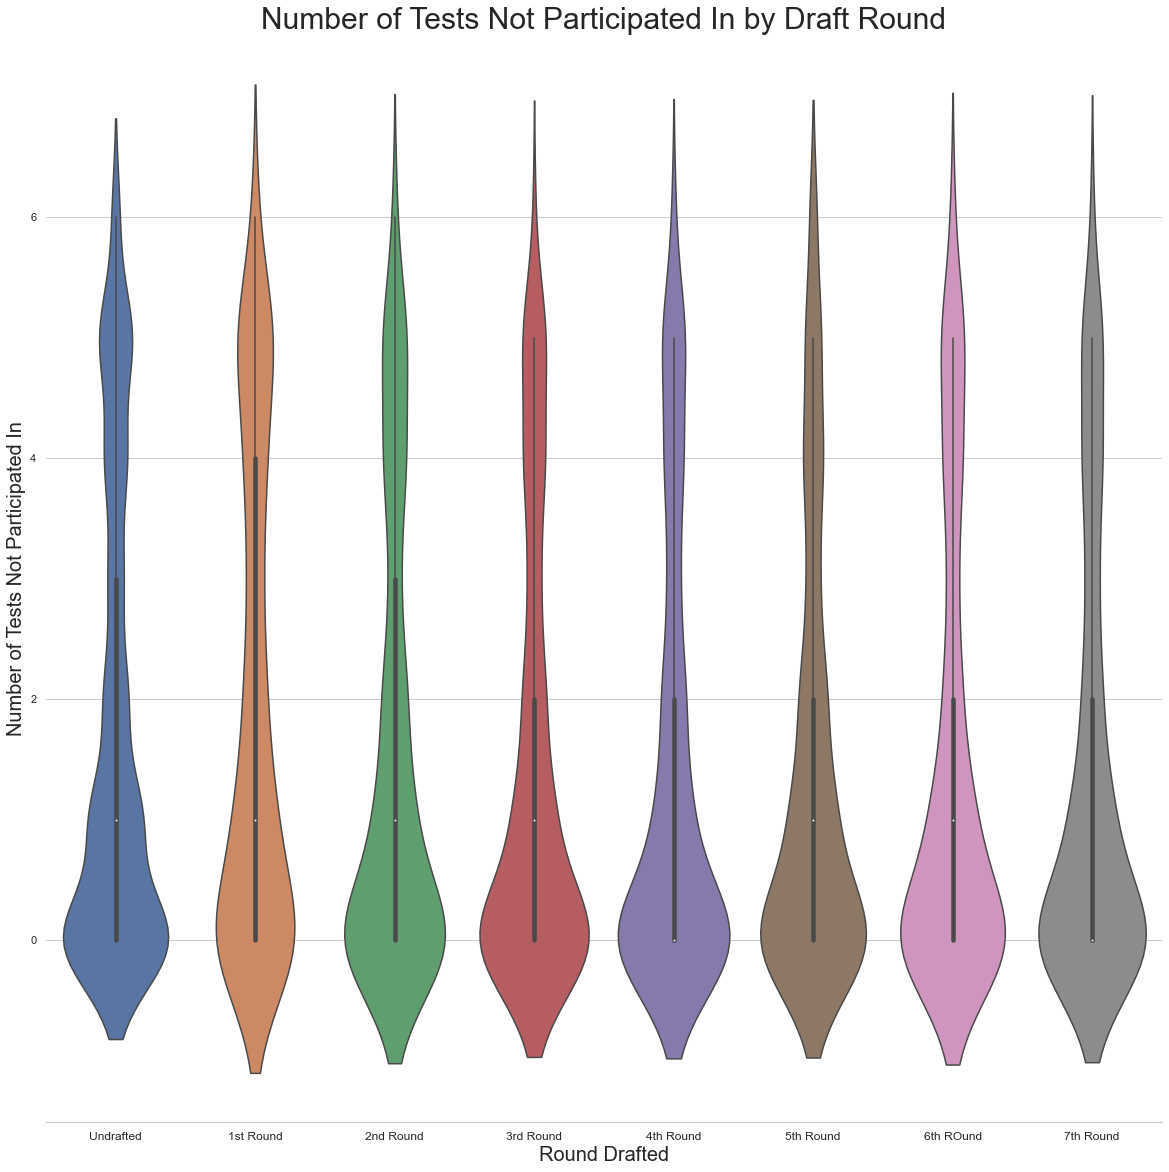

In [1952]:
violin_graph(nfl_combine_df,'Number of Tests Not Participated In by Draft Round','Round Drafted','Number of Tests Not Participated In')